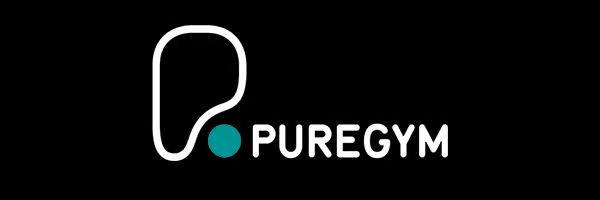

# PureGym Performance Optimization Analysis

## <font color='teal'>Introduction</font> 
This Jupyter Notebook is part of the analytical process aimed at enhancing PureGym's business performance by improving customer retention and attracting new sign-ups through the optimization of services and offerings. Our analysis focuses on understanding the diverse needs and behaviors of PureGym members to tailor our services more effectively.

## <font color='teal'>Project Objectives</font> 
- **Enhance Product Suitability**: Analyze member usage patterns to align gym offerings with user preferences.
- **Optimize Group Exercise Provision**: Evaluate and improve group exercise schedules and availability to maximize member participation.
- **Improve Member Experience**: Leverage member feedback and interaction data to enhance the overall gym experience.
- **Drive Business Performance**: Use insights derived from data to inform strategic decisions and boost business outcomes.


## <font color='teal'>Data Sources</font> 
This analysis utilizes several datasets, including:
- `gyms_data.csv`: Information about gym locations and facilities.
- `timetable_data.csv`: Data on class schedules and group exercise timings.
- `class_data.csv`: Records of class bookings and attendance.
- `visit_data.csv`: Logs of member visits to the gym.


## <font color='teal'>Analytical Approach</font> 
The following steps outline our approach to analyzing the PureGym data:
1. **Data Cleaning and Integration**: Prepare and merge data sources for comprehensive analysis.
2. **Exploratory Data Analysis (EDA)**: Conduct preliminary analysis to understand data distributions and identify patterns.
3. **In-Depth Analysis**: Use statistical methods and machine learning techniques like k-means clustering to derive deeper insights.
4. **Visualization and Reporting**: Develop interactive visualizations and dashboards to present findings.
5. **Strategic Recommendations**: Provide actionable recommendations based on analytical insights.

## <font color='teal'>Notebooks Outline</font> 
- **Section 1: Data Preparation**
  - Importing data
  - Cleaning and preprocessing
- **Section 2: Exploratory Data Analysis**
  - Statistical summaries
  - Visualization of key metrics
- **Section 3: In-Depth Analytical Models**
  - Clustering analysis
  - Sentiment analysis of member reviews
- **Section 4: Conclusion and Recommendations**
  
Each section includes detailed code, comments, and visualizations to support our analytical findings and recommendations.

---


## Section 1: Data Preparation

 - Importing data
 - Cleaning and preprocessing

#### Importng all necessary Libraries and Data

In [1]:
# Import the necessary libraries.
# Data wrangling.
import numpy as np
import pandas as pd

# Data visulisation.
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Statistics: Linear Regression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn import linear_model

# Statistics: Clustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sentiment Analysis 
import nltk 
import os 
nltk.download ('punkt')
nltk.download ('stopwords')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from textblob import TextBlob

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayeshakhalil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayeshakhalil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Loading all Datasets

In [2]:
# Import the PureGym data sets.
class_data = pd.read_csv('class_data.csv')
gym_data = pd.read_csv('gym_data.csv')
timetable_data = pd.read_csv('timetable_data.csv')
visit_data = pd.read_csv('visit_data.csv')

#### Data Cleaning and Pre-Processing

##### Class Data (class_data.csv)

In [3]:
# View the Dataframe
class_data

,booking_id,class_name,center_id,state,start_date_time,stop_date_time,class_capacity,participation_status,female,male,unknown,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_35,class_key
0,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,0,2,2,0
1,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,CANCELLED,10,0,0,0,1,0,1,4,8,1
2,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,ATTENDED,13,1,0,0,1,4,3,1,6,2
3,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,2,0,0,3
4,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,CANCELLED,9,0,0,0,2,1,0,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60123,34book134620,Kettlebell,34,ACTIVE,2023-08-24T07:45:00.000Z,2023-08-24T08:15:00.000Z,24,ATTENDED,2,1,0,0,0,0,0,1,3,25769820301
60124,34book134620,Kettlebell,34,ACTIVE,2023-08-24T07:45:00.000Z,2023-08-24T08:15:00.000Z,24,CANCELLED,5,0,0,0,0,2,1,1,2,25769820302
60125,34book134621,Kettlebell,34,ACTIVE,2023-08-31T07:45:00.000Z,2023-08-31T08:15:00.000Z,24,NO SHOW,2,0,0,0,0,0,1,1,1,25769820303
60126,34book134621,Kettlebell,34,ACTIVE,2023-08-31T07:45:00.000Z,2023-08-31T08:15:00.000Z,24,ATTENDED,2,2,0,0,0,0,1,2,3,25769820304


In [4]:
# Sense-check the DataFrame 
print(class_data.shape)
print(class_data.dtypes)
print(class_data.columns)

(60128, 18)
booking_id              object
class_name              object
center_id                int64
state                   object
start_date_time         object
stop_date_time          object
class_capacity           int64
participation_status    object
female                   int64
male                     int64
unknown                  int64
age_16_17                int64
age_18_22                int64
age_23_28                int64
age_29_34                int64
age_35_44                int64
age_over_35              int64
class_key                int64
dtype: object
Index(['booking_id', 'class_name', 'center_id', 'state', 'start_date_time',
       'stop_date_time', 'class_capacity', 'participation_status', 'female',
       'male', 'unknown', 'age_16_17', 'age_18_22', 'age_23_28', 'age_29_34',
       'age_35_44', 'age_over_35', 'class_key'],
      dtype='object')


In [5]:
# Check for missing values
class_data_na = class_data.isna().sum()
print(class_data_na)

booking_id              0
class_name              0
center_id               0
state                   0
start_date_time         0
stop_date_time          0
class_capacity          0
participation_status    0
female                  0
male                    0
unknown                 0
age_16_17               0
age_18_22               0
age_23_28               0
age_29_34               0
age_35_44               0
age_over_35             0
class_key               0
dtype: int64


In [6]:
# Calculate the count for individuals over 44
class_data['age_over_44'] = class_data['age_over_35'] - class_data['age_35_44']

# Show the updated DataFrame to confirm the changes
class_data.head()

,booking_id,class_name,center_id,state,start_date_time,stop_date_time,class_capacity,participation_status,female,male,unknown,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_35,class_key,age_over_44
0,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,0,2,2,0,0
1,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,CANCELLED,10,0,0,0,1,0,1,4,8,1,4
2,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,ATTENDED,13,1,0,0,1,4,3,1,6,2,5
3,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,2,0,0,3,0
4,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,CANCELLED,9,0,0,0,2,1,0,4,6,4,2


In [7]:
# Calculate the total number of people over the age of 44
total_over_44 = class_data['age_over_44'].sum()
total_over_44

74656

In [8]:
# Create new column for total number. 
class_data['total'] = class_data['female'] + class_data['male'] + class_data['unknown']

In [9]:
# Reorder the columns.
class_data = class_data[['booking_id', 'class_name', 
                         'center_id', 'state', 'start_date_time',
                         'stop_date_time', 'class_capacity', 
                         'participation_status', 'female','male', 'unknown', 
                         'total', 
                         'age_16_17', 'age_18_22', 'age_23_28', 'age_29_34',
                         'age_35_44', 'age_over_44','class_key' ]]

In [10]:
# Replace entries containing 'bootcamp ' with 'bootcamp'
class_data['class_name'] = class_data['class_name'].replace(
    'Bootcamp ', 'Bootcamp', regex=True)

# Replace entries containing 'Heart Month ' with 'heart month'
class_data['class_name'] = class_data['class_name'].replace(
    'Pump for Heart Month', 'Pump for heart month', regex=True)
class_data['class_name'] = class_data['class_name'].replace(
    'Cycle for Heart Month', 'Cycle for heart month', regex=True)

# Replace entries containing 'Cycle ' with 'Cycle'
class_data['class_name'] = class_data['class_name'].replace(
    'Cycle ', 'Cycle', regex=True)

In [11]:
# Convert columns to appropriate datetime formats
class_data['start_date_time'] = pd.to_datetime(class_data[
    'start_date_time']).dt.tz_localize(None)
class_data['stop_date_time'] = pd.to_datetime(class_data[
    'stop_date_time']).dt.tz_localize(None)
# View the dataframe to check
class_data.dtypes

booking_id                      object
class_name                      object
center_id                        int64
state                           object
start_date_time         datetime64[ns]
stop_date_time          datetime64[ns]
class_capacity                   int64
participation_status            object
female                           int64
male                             int64
unknown                          int64
total                            int64
age_16_17                        int64
age_18_22                        int64
age_23_28                        int64
age_29_34                        int64
age_35_44                        int64
age_over_44                      int64
class_key                        int64
dtype: object

In [12]:
# Converting start_date_time to datetime to extract the hour and day of the week
class_data['start_date_time'] = pd.to_datetime(class_data['start_date_time'])

# Adding new columns for hour of day and day of week for further analysis
class_data['hour_of_day'] = class_data['start_date_time'].dt.hour
class_data['day_of_week'] = class_data['start_date_time'].dt.day_name()

In [13]:
# Save the cleaned dataset
cleaned_file_path = 'class_data_cleaned.csv' 
class_data.to_csv(cleaned_file_path, index=False)

##### Gym Data (gym_data.csv)

In [14]:
# View the Dataframe
gym_data

,center_id,opening_date,format,floor_area_net_usable_with_changing,country,division,region,studio,spin,functional,offpeak_MF_1,offpeak_MF_2,offpeak_MF_3,offpeak_MF_4,offpeak_SS
0,293,04/02/2020,LBF,12297,England,East,Region 11,Y,Y,N,NaN,NaN,NaN,NaN,NaN
1,34,06/12/2012,LBF,16783,England,West,Region 6,Y,Y,Y,NaN,NaN,NaN,NaN,NaN
2,264,02/10/2019,SBF,7332,England,West,Region 9,Y,N,Y,12:00am -4:00pm,9:00pm -12:00am (Midnight),NaN,NaN,All Day
3,174,02/02/2017,LBF,14570,England,North,Region 4,Y,Y,Y,12:00am -3:30pm,8:30pm -12:00am (Midnight),NaN,NaN,All Day
4,28,13/09/2012,LBF,17174,England,North,Region 5,Y,Y,Y,NaN,NaN,NaN,NaN,NaN
5,168,10/01/2017,MBF,8991,England,East,Region 16,Y,N,N,12:00am -6:00am,\t8:30am -11:30am,1:30pm -4:00pm,9:00pm -12:00am (Midnight),All Day
6,314,23/12/2021,MBF,8004,England,East,Region 12,Y,N,N,NaN,NaN,NaN,NaN,NaN
7,14,18/03/2011,LBF,17116,England,North,Region 3,Y,Y,Y,NaN,NaN,NaN,NaN,NaN
8,216,01/11/2018,SBF,6906,England,East,Region 13,Y,Y,Y,NaN,NaN,NaN,NaN,NaN
9,30,08/12/2011,MBF,7091,England,East,Region 14,Y,N,Y,NaN,NaN,NaN,NaN,NaN


In [15]:
# Sense-check the DataFrame 
print(gym_data.shape)
print(gym_data.dtypes)
print(gym_data.columns)

(10, 15)
center_id                               int64
opening_date                           object
format                                 object
floor_area_net_usable_with_changing     int64
country                                object
division                               object
region                                 object
studio                                 object
spin                                   object
functional                             object
offpeak_MF_1                           object
offpeak_MF_2                           object
offpeak_MF_3                           object
offpeak_MF_4                           object
offpeak_SS                             object
dtype: object
Index(['center_id', 'opening_date', 'format',
       'floor_area_net_usable_with_changing', 'country', 'division', 'region',
       'studio', 'spin', 'functional', 'offpeak_MF_1', 'offpeak_MF_2',
       'offpeak_MF_3', 'offpeak_MF_4', 'offpeak_SS'],
      dtype='object')


In [16]:
# Any missing values?
missing_values = gym_data.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing values in the DataFrame.")
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.
center_id                              0
opening_date                           0
format                                 0
floor_area_net_usable_with_changing    0
country                                0
division                               0
region                                 0
studio                                 0
spin                                   0
functional                             0
offpeak_MF_1                           7
offpeak_MF_2                           7
offpeak_MF_3                           9
offpeak_MF_4                           9
offpeak_SS                             7
dtype: int64


In [17]:
# Handling missing values
numerical_cols = gym_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = gym_data.select_dtypes(include=['object']).columns
gym_data[numerical_cols] = gym_data[numerical_cols].fillna(gym_data[numerical_cols].median())
gym_data[categorical_cols] = gym_data[categorical_cols].fillna('Unknown')

# Removing duplicates
gym_data = gym_data.drop_duplicates()

# Fixing data types
gym_data['opening_date'] = pd.to_datetime(gym_data['opening_date'], errors='coerce')

# Display the cleaned data summary
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   center_id                            10 non-null     int64         
 1   opening_date                         7 non-null      datetime64[ns]
 2   format                               10 non-null     object        
 3   floor_area_net_usable_with_changing  10 non-null     int64         
 4   country                              10 non-null     object        
 5   division                             10 non-null     object        
 6   region                               10 non-null     object        
 7   studio                               10 non-null     object        
 8   spin                                 10 non-null     object        
 9   functional                           10 non-null     object        
 10  offpeak_MF_1     

In [18]:
# Standardize the off-peak columns
off_peak_columns = ['offpeak_MF_1', 'offpeak_MF_2', 
                    'offpeak_MF_3', 'offpeak_MF_4', 'offpeak_SS']

for column in off_peak_columns:
    # Trim whitespace
    gym_data[column] = gym_data[column].str.strip()
    # Remove any additional descriptive text
    gym_data[column] = gym_data[column].str.replace(r'(\s*\(.*?\))', 
                                                    '', regex=True)
# Display the unique values again to confirm changes
off_peak_unique_values_after = {column: gym_data[column].unique() 
                                for column in off_peak_columns}

off_peak_unique_values_after

{'offpeak_MF_1': array(['Unknown', '12:00am -4:00pm', '12:00am -3:30pm', '12:00am -6:00am'],
       dtype=object),
 'offpeak_MF_2': array(['Unknown', '9:00pm -12:00am', '8:30pm -12:00am', '8:30am -11:30am'],
       dtype=object),
 'offpeak_MF_3': array(['Unknown', '1:30pm -4:00pm'], dtype=object),
 'offpeak_MF_4': array(['Unknown', '9:00pm -12:00am'], dtype=object),
 'offpeak_SS': array(['Unknown', 'All Day'], dtype=object)}

In [19]:
# Save the cleaned dataset
cleaned_file_path = 'gym_data_cleaned.csv' 
gym_data.to_csv(cleaned_file_path, index=False)

##### Timetable Data (timetable_data.csv)

In [20]:
# View the Dataframe
timetable_data

,center_id,space_type,day_of_week,slot_start_time,slot_end_time,class_name,class_length,timetable_key
0,14,STUDIO,Sunday,08:00:00,13:29:59,Pump,45,0
1,14,STUDIO,Thursday,12:00:00,14:59:59,Yoga,60,1
2,14,STUDIO,Thursday,12:00:00,14:59:59,LBT,45,2
3,14,STUDIO,Thursday,16:30:00,20:29:59,Bodytone,45,3
4,14,STUDIO,Sunday,08:00:00,13:29:59,LBT,30,4
...,...,...,...,...,...,...,...,...
1126,314,STUDIO,Wednesday,12:00:00,14:59:59,Step,45,1126
1127,314,STUDIO,Wednesday,16:30:00,20:29:59,Zumba,60,1127
1128,314,STUDIO,Wednesday,16:30:00,20:29:59,Dance,45,1128
1129,314,STUDIO,Tuesday,16:30:00,20:29:59,Yoga,45,1129


In [21]:
# Sense-check the DataFrame 
print(timetable_data.shape)
print(timetable_data.dtypes)
print(timetable_data.columns)

(1131, 8)
center_id           int64
space_type         object
day_of_week        object
slot_start_time    object
slot_end_time      object
class_name         object
class_length        int64
timetable_key       int64
dtype: object
Index(['center_id', 'space_type', 'day_of_week', 'slot_start_time',
       'slot_end_time', 'class_name', 'class_length', 'timetable_key'],
      dtype='object')


In [22]:
# Any missing values?
missing_values = timetable_data.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing values in the DataFrame.")
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [23]:
# Converting the slot_start_time and slot_end_time columns to datetime format. 
timetable_data['slot_start_time'] = pd.to_datetime(timetable_data['slot_start_time'])
timetable_data['slot_end_time'] = pd.to_datetime(timetable_data['slot_end_time'])
timetable_data.dtypes

center_id                   int64
space_type                 object
day_of_week                object
slot_start_time    datetime64[ns]
slot_end_time      datetime64[ns]
class_name                 object
class_length                int64
timetable_key               int64
dtype: object

In [24]:
# Save the cleaned dataset
cleaned_file_path = 'timetable_data_cleaned.csv' 
timetable_data.to_csv(cleaned_file_path, index=False)

##### Visit Data (visit_data.csv)

In [25]:
#View the dataframe
visit_data

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group
0,c6aebdafc1df3da04006f10717b2047e54971ed8a3109b...,168,2022-12-19T18:10:04.000Z,2022-12-19T19:46:03.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
1,637357cf7a3295545081fb1bcf3ba615d24690113339ad...,168,2023-03-14T16:18:03.000Z,2023-03-14T18:04:45.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
2,bc3f8f92d1c4602234f16889a7be41445e5829dd7826b6...,168,2023-08-21T11:33:21.000Z,2023-08-21T13:29:36.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
3,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,2023-07-01T13:02:47.000Z,2023-07-01T14:47:08.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
4,8761fa65f4c19a78879131bf937eb310110cc03fc6159a...,264,2023-06-25T14:08:13.000Z,2023-06-25T14:49:40.000Z,ACCESS_GRANTED,MALE,30,CORE
...,...,...,...,...,...,...,...,...
683277,37a796a447c22d04d07cf3f3656e9a9e99de3ff5c35f07...,174,2023-08-18T20:30:18.000Z,2023-08-18T22:08:30.000Z,ACCESS_GRANTED,FEMALE,32,OFF PEAK
683278,0ed687adbd5a0fd4905f9d13e33927a6ee8979e3e77b1e...,174,2023-08-23T20:39:31.000Z,2023-08-23T21:36:04.000Z,ACCESS_GRANTED,FEMALE,32,OFF PEAK
683279,3c88475f33914f822aa052b4631659f338b730683856df...,174,2023-08-22T20:39:36.000Z,2023-08-22T21:59:50.000Z,ACCESS_GRANTED,FEMALE,32,OFF PEAK
683280,351c7f74e7d0d0d8602f2cee2925f093dd5d3829b7b019...,174,2023-08-20T17:05:10.000Z,2023-08-20T18:33:41.000Z,ACCESS_GRANTED,FEMALE,32,OFF PEAK


In [26]:
# Sense-check the data
print(visit_data.shape)
print(visit_data.dtypes)
print(visit_data.columns)

(683282, 8)
visit_key             object
center_id              int64
check_in_datetime     object
check_out_datetime    object
check_in_result       object
gender                object
age                    int64
product_group         object
dtype: object
Index(['visit_key', 'center_id', 'check_in_datetime', 'check_out_datetime',
       'check_in_result', 'gender', 'age', 'product_group'],
      dtype='object')


In [27]:
# Convert the datetime columns
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])
visit_data['check_out_datetime'] = pd.to_datetime(visit_data['check_out_datetime'])

# Check the new data types to ensure the conversion worked
visit_data.dtypes

visit_key                          object
center_id                           int64
check_in_datetime     datetime64[ns, UTC]
check_out_datetime    datetime64[ns, UTC]
check_in_result                    object
gender                             object
age                                 int64
product_group                      object
dtype: object

In [28]:
# Converting start_date_time to datetime to extract the hour and day of the week
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])

# Adding new columns for hour of day and day of week for further analysis
visit_data['hour_of_day'] = visit_data['check_in_datetime'].dt.hour
visit_data['day_of_week'] = visit_data['check_in_datetime'].dt.day_name()

In [29]:
# Save the cleaned dataset
cleaned_file_path = 'visit_data_cleaned.csv' 
visit_data.to_csv(cleaned_file_path, index=False)

## Section 2: Exploratory Data Analysis

 - Statistical summaries
- Visualization of key metrics

### 2.1 Member Demogaphics Analysis

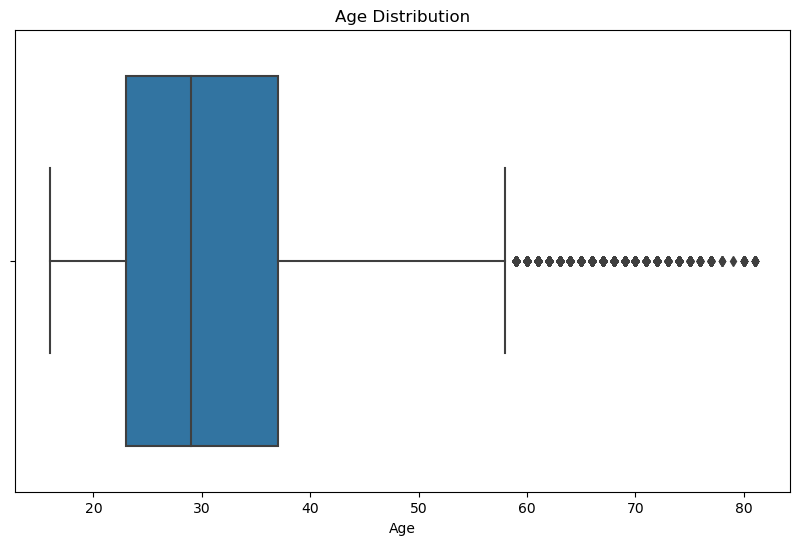

In [30]:
# Filter out all entries where the age is greater than 100
visit_data = visit_data[visit_data['age'] <= 100]

# Create the revised box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=visit_data['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

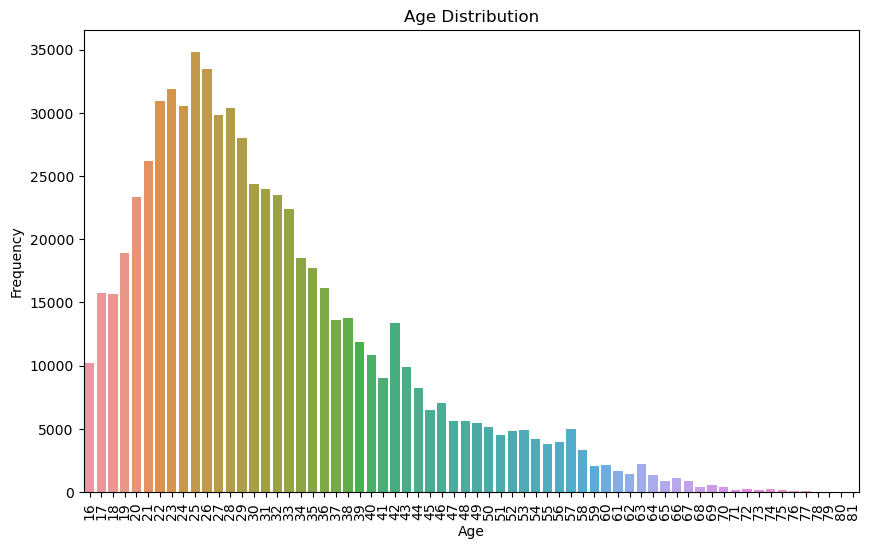

In [31]:
# Filter out all entries where the age is greater than 100
visit_data = visit_data[visit_data['age'] <= 100]

# Create a bar plot for age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=visit_data)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if necessary
plt.show()

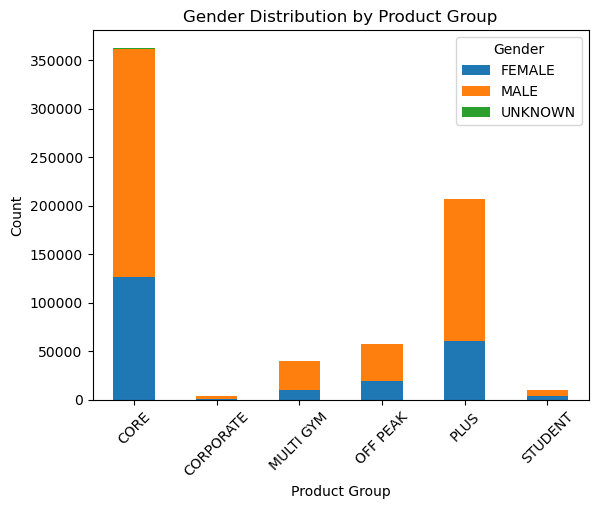

In [32]:
# Plotting the gender distribution within each product group
gender_distribution = visit_data.groupby(['product_group', 'gender']).size().unstack(fill_value=0)
gender_distribution.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### 2.2 Member Engamgent and Gym Visits Analysis

#### 2.2.1 Gym Visits Analysis

In [33]:
# Convert check_in_datetime to datetime
visit_data['check_in_datetime'] = pd.to_datetime(
    visit_data['check_in_datetime'])

# Extract the date from check_in_datetime
visit_data['date'] = visit_data['check_in_datetime'].dt.date

# Count the number of unique visit_keys per day. 
unique_visits_per_day = visit_data.groupby('date')['visit_key'].nunique()
unique_visits_per_day

date
2022-09-01    1742
2022-09-02    1644
2022-09-03    1377
2022-09-04    1305
2022-09-05    2085
              ... 
2023-08-27    1255
2023-08-28    1627
2023-08-29    1910
2023-08-30    1982
2023-08-31    1852
Name: visit_key, Length: 364, dtype: int64

In [34]:
# Extract the date from check_in_datetime
visit_data['date'] = visit_data['check_in_datetime'].dt.date

# Count the number of unique visit_keys per day. 
unique_visits_per_day = visit_data.groupby('date')['visit_key'].nunique()

# Calculate the average number of visits per day
average_visits_per_day = unique_visits_per_day.mean()

# Print the average number of visits per day
print(f"The average number of visits per day is {average_visits_per_day:.2f}")

The average number of visits per day is 1876.47


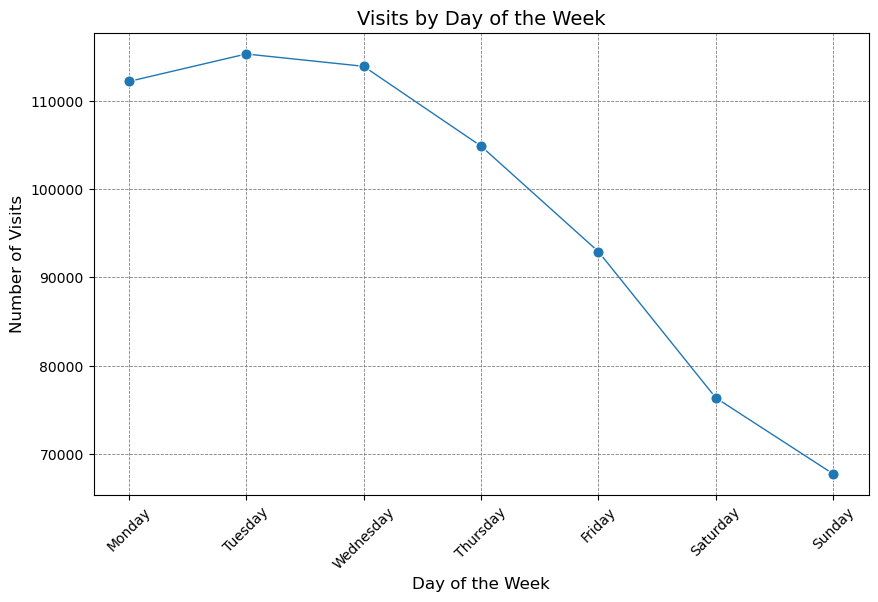

In [35]:
# Define the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type with a defined order
visit_data['day_of_week'] = pd.Categorical(visit_data['day_of_week'], 
                                           categories=day_order, ordered=True)

# Group the data by 'day_of_week' and count the number of visits for each day
visits_by_day = visit_data.groupby('day_of_week').size()

# Plot using Seaborn for a line plot with ordered days
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=visits_by_day, marker='o', 
             linewidth=1, markersize=8)

# Add title and labels with customized settings
plt.title('Visits by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)

# Setting grid style and tick customization
plt.grid(True, linestyle='--', linewidth=0.6, color='gray')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

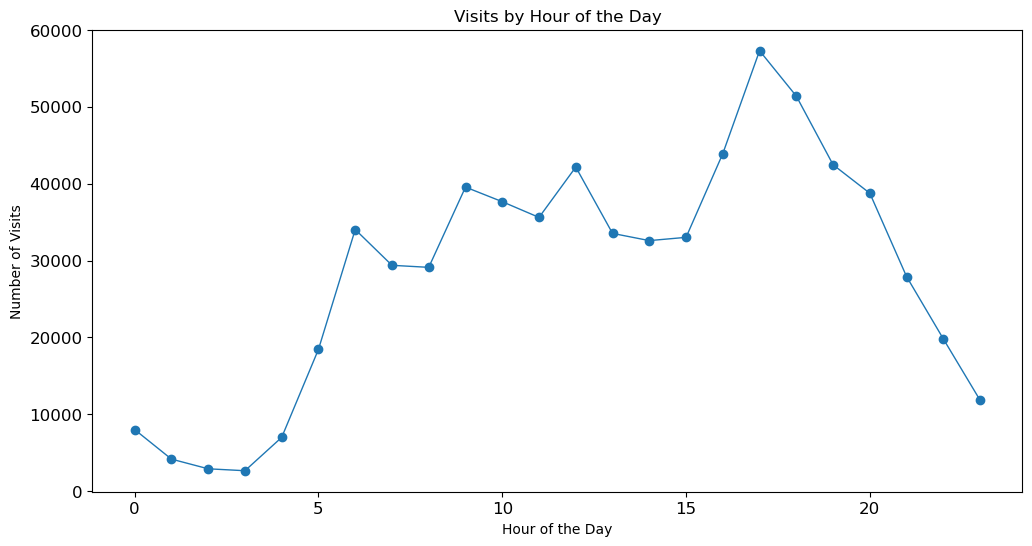

In [36]:
# Count visits by hour of the day
visits_by_hour = visit_data.groupby('hour_of_day').size()

# Setting the tick parameters for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Plot the chart
visits_by_hour.plot(kind='line', figsize=(12, 6), 
                    marker='o',linewidth=1)
plt.title('Visits by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()

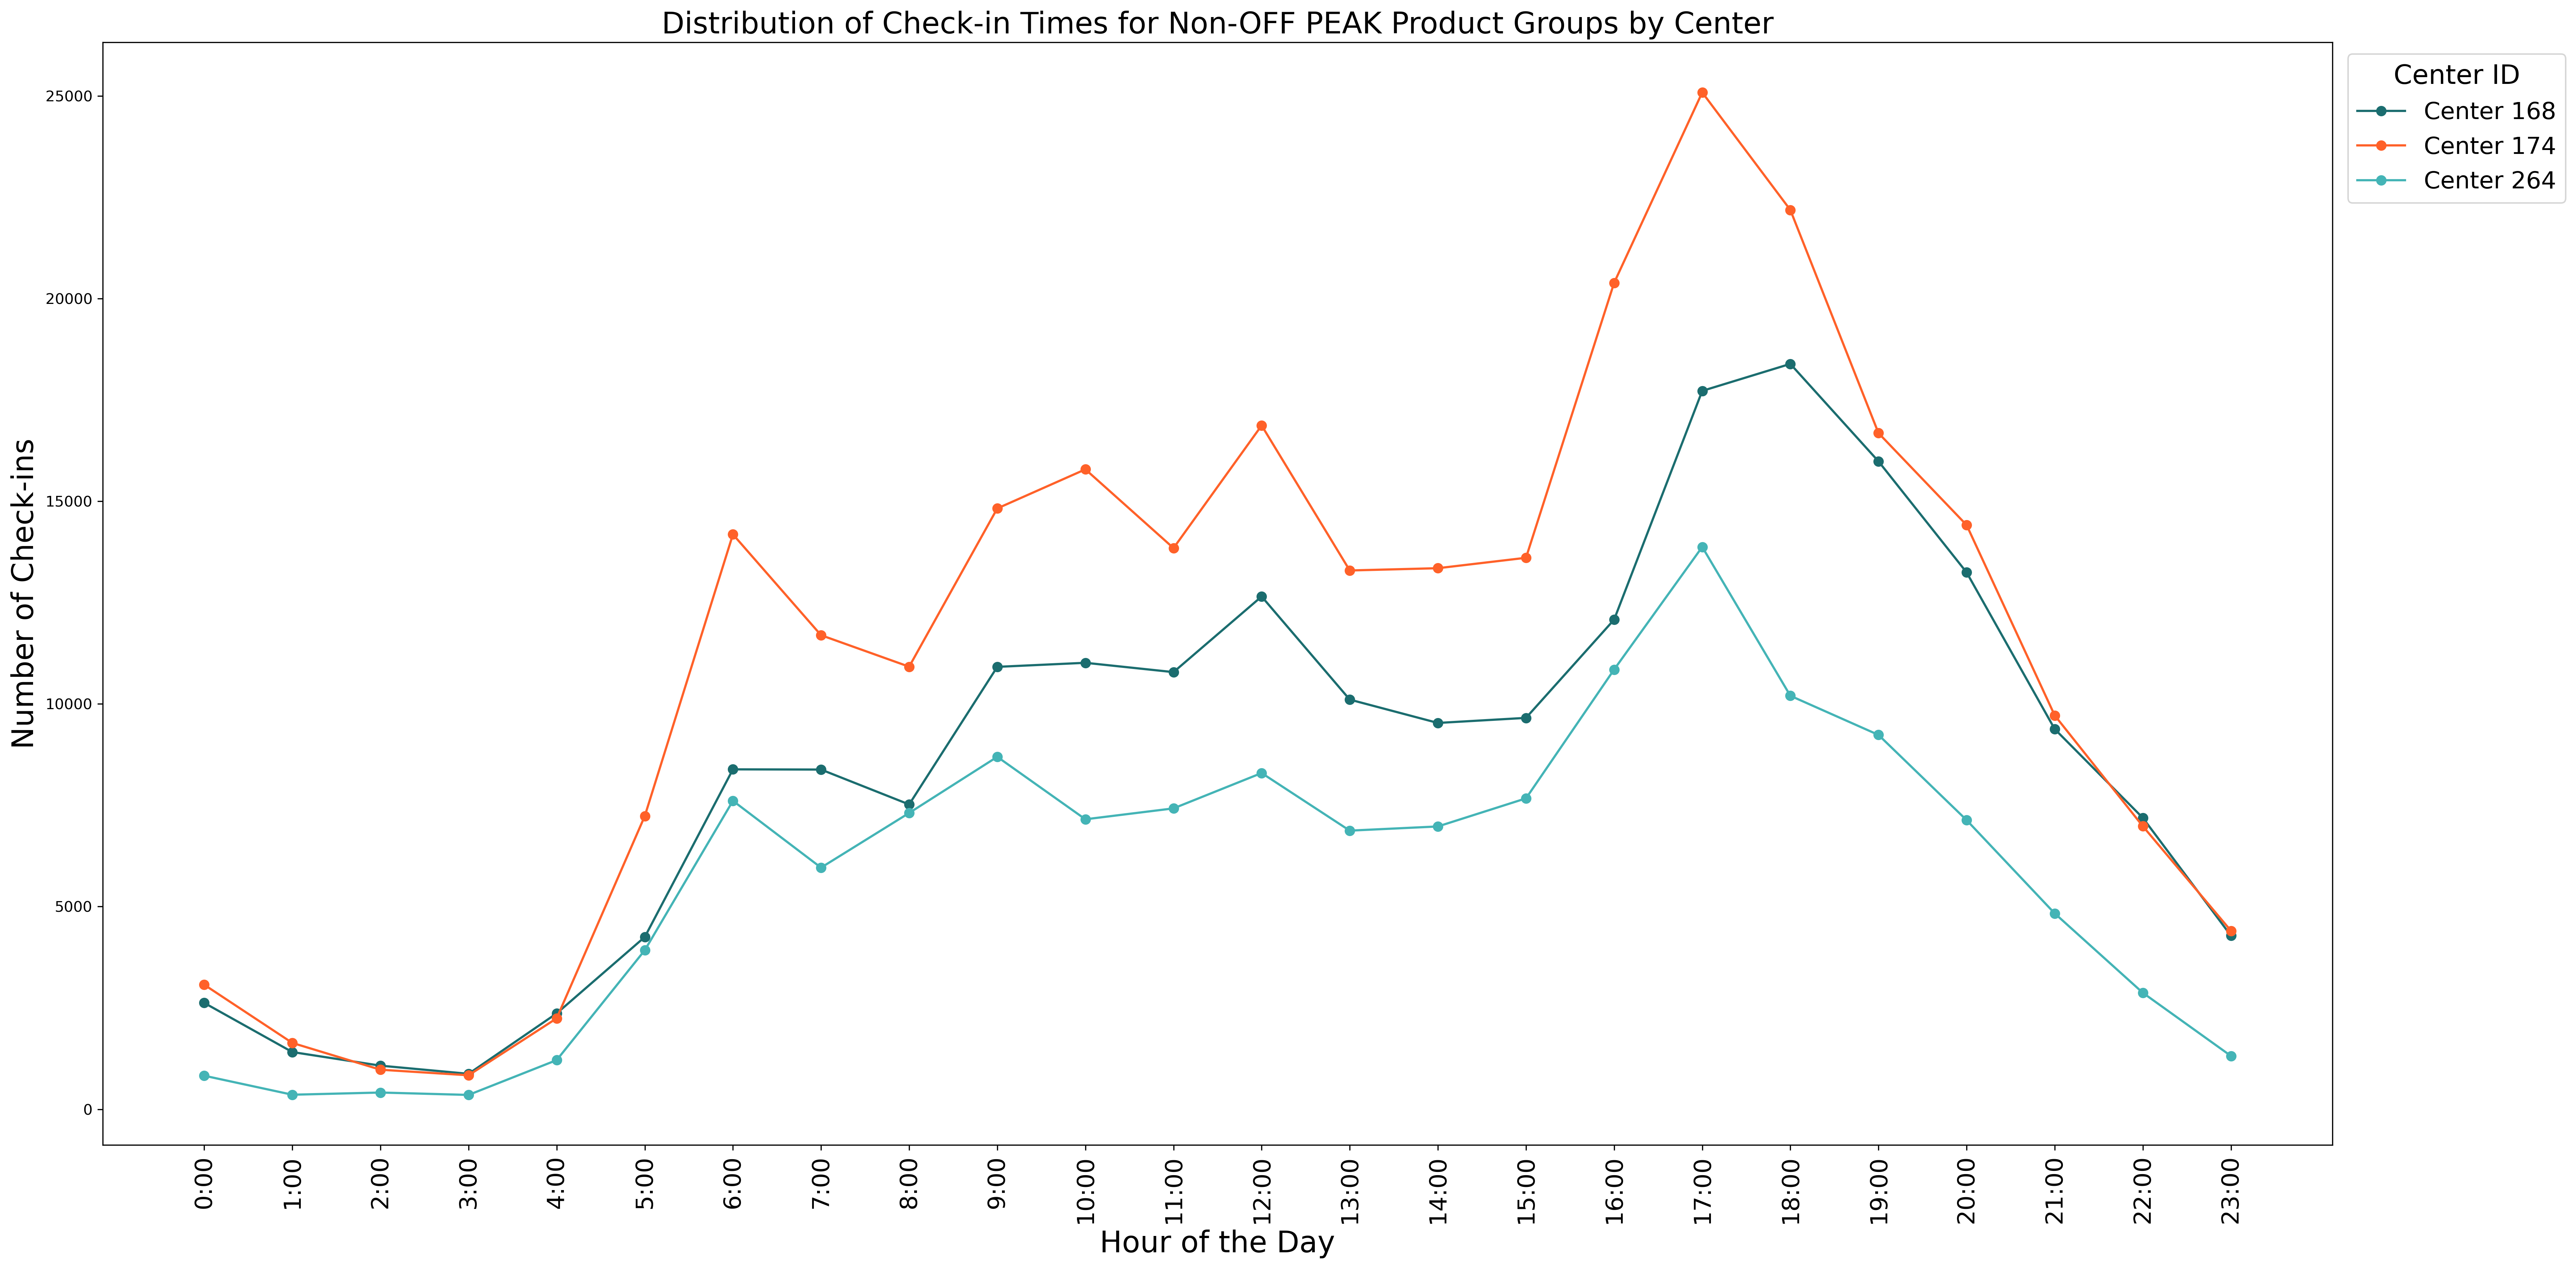

In [37]:
# Filter out the 'OFF PEAK' product group
non_off_peak_data = visit_data[visit_data['product_group'] != 'OFF PEAK']

# Create a pivot table to count check-ins by hour and center, excluding 'OFF PEAK'
pivot_table_non_off_peak = non_off_peak_data.pivot_table(values='visit_key', 
                                                         index=non_off_peak_data['check_in_datetime'].dt.hour, 
                                                         columns='center_id', 
                                                         aggfunc='count').fillna(0)

# Start the plot with a large figure size to ensure every hour label fits
plt.figure(figsize=(24, 12), dpi=300)

# Define custom colors for each center
custom_colors = ['#1B6D6F', '#FF6129', '#44B4B6']

# Plot each gym center as a separate line
for i, center_id in enumerate(pivot_table_non_off_peak.columns):
    plt.plot(pivot_table_non_off_peak.index, 
             pivot_table_non_off_peak[center_id], marker='o', 
             label=f'Center {center_id}', color=custom_colors[i])

# Plot each center as a separate line, excluding 'OFF PEAK'
# for center_id in pivot_table_non_off_peak.columns:
# plt.plot(pivot_table_non_off_peak.index, pivot_table_non_off_peak[center_id], 
# marker='o', label=f'Center {center_id}')

# Set x-ticks to show every hour
plt.xticks(range(0, 24), [f'{hour}:00' for hour in range(0, 24)], 
           rotation=90, size=16)

# Set the title and labels with larger font sizes for readability
plt.title('Distribution of Check-in Times for Non-OFF PEAK Product Groups by Center', 
          fontsize=20)
plt.xlabel('Hour of the Day', fontsize=20)
plt.ylabel('Number of Check-ins', fontsize=20)

# Show grid lines
plt.grid(False)

# Add a legend
plt.legend(title='Center ID', fontsize=16, title_fontsize=18, bbox_to_anchor=(1.11, 1))

# Use tight layout to fit everything into the figure neatly
plt.tight_layout()

# Display the plot
plt.show()

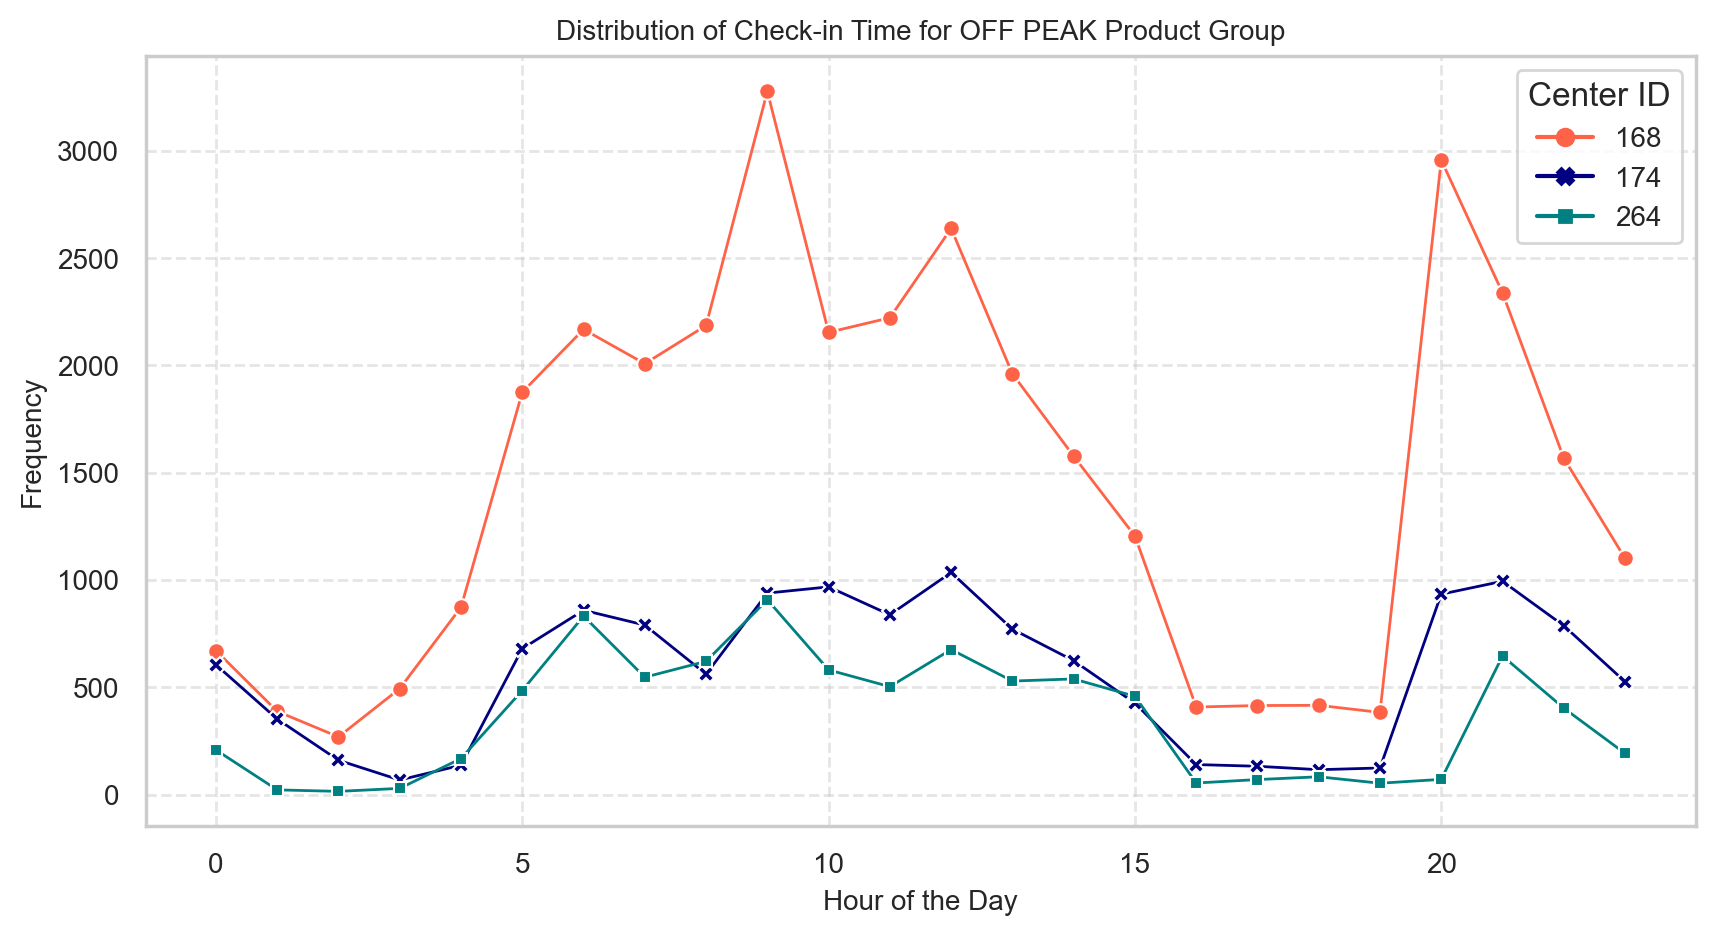

In [38]:
# Filter the DataFrame for product group "OFF PEAK"
off_peak_data = visit_data[visit_data['product_group'] == 'OFF PEAK']
off_peak_data['hour'] = off_peak_data['check_in_datetime'].dt.hour
off_peak_counts = off_peak_data.groupby(['hour', 'center_id']).size().unstack()

# Convert the DataFrame from wide to long format suitable for Seaborn
off_peak_long = off_peak_counts.reset_index().melt(id_vars=['hour'], 
                                                   var_name='center_id', 
                                                   value_name='frequency')

# Set the aesthetic style and color palette
sns.set(style="whitegrid")
custom_colors = ["#FF6347", "navy", "teal"]

# Create the line plot with Seaborn using the custom color palette
plt.figure(figsize=(10, 5), dpi=200)
lineplot = sns.lineplot(data=off_peak_long, x='hour', y='frequency', 
                        hue='center_id', style='center_id',
                        markers=True, dashes=False, 
                        linewidth=1, palette=custom_colors)

# Set labels and title with enhanced font settings
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of Check-in Time for OFF PEAK Product Group', 
          fontsize=10)

# Customize legend
plt.legend(title='Center ID', loc='upper right', 
           fontsize=10)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Set tick parameters
plt.tick_params(axis='both', which='major', 
                labelsize=10)


# Show the plot
plt.show()

 > <font color='blue'>For Gym visit forecast analysis please refer to Additional Analysis Notebook attached with this analytics package</font>

#### Duration of Stay

In [39]:
# Convert check-in and check-out datetimes to datetime objects
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])
visit_data['check_out_datetime'] = pd.to_datetime(visit_data['check_out_datetime'])

# Calculate duration of each visit in hours
visit_data['visit_duration'] = (visit_data['check_out_datetime'] - 
                                visit_data['check_in_datetime']).dt.total_seconds() / 3600

In [40]:
# Calculating the duration of each visit in hours as you have done
visit_data['visit_duration'] = (visit_data['check_out_datetime'] - 
                                visit_data['check_in_datetime']).dt.total_seconds() / 3600

# Calculate the average duration of visits
average_duration = visit_data['visit_duration'].mean()

# Print the average duration
print(f"The average visit duration is {average_duration:.2f} hours.")

The average visit duration is 1.14 hours.


 ### 2.3 Group Exercise Performance Analysis 
> 2.3.1 Descriptive Statistics

> 2.3.2 Class Offering Analysis

> 2.3.3 Class Participation and Popularity Analysis

> 2.3.4 Time Series Analysis of Class Participation Status

> 2.3.5 No Shows Analysis

#### 2.3.1 Descriptive Statistics

In [41]:
# Descriptive statistics for numerical data to identify potential outliers
class_numerical_stats = class_data.describe(include=[int, float])

# Frequency count for categorical data to identify inconsistencies
class_categorical_columns = class_data.select_dtypes(include=['object']).columns
class_categorical_stats = {column: class_data[column].value_counts() for column in class_categorical_columns}

class_numerical_stats, class_categorical_stats

(          center_id  class_capacity        female          male       unknown  \
 count  60128.000000    60128.000000  60128.000000  60128.000000  60128.000000   
 mean     140.038052       20.703000      4.047748      0.821847      0.030751   
 std      111.072795        7.945762      4.073227      1.338706      0.177863   
 min       14.000000        1.000000      0.000000      0.000000      0.000000   
 25%       28.000000       16.000000      1.000000      0.000000      0.000000   
 50%      168.000000       23.000000      3.000000      0.000000      0.000000   
 75%      264.000000       28.000000      6.000000      1.000000      0.000000   
 max      314.000000       37.000000     46.000000     14.000000      3.000000   
 
               total     age_16_17     age_18_22     age_23_28     age_29_34  \
 count  60128.000000  60128.000000  60128.000000  60128.000000  60128.000000   
 mean       4.900346      0.027325      0.308375      1.108186      1.071497   
 std        4.795103

In [42]:
# Convert 'start_date_time' and 'stop_date_time' to datetime format, if not already done
class_data['start_date_time'] = pd.to_datetime(class_data['start_date_time'])
class_data['stop_date_time'] = pd.to_datetime(class_data['stop_date_time'])

# Calculate the duration of each class
class_data['duration'] = class_data['stop_date_time'] - class_data['start_date_time']

# Convert the duration from a timedelta to minutes
class_data['duration_minutes'] = class_data['duration'].dt.total_seconds() / 60

# Display the first few rows to verify
class_data[['start_date_time', 'stop_date_time', 'duration', 'duration_minutes']].head()

,start_date_time,stop_date_time,duration,duration_minutes
0,2022-09-07 17:30:00,2022-09-07 18:00:00,0 days 00:30:00,30.0
1,2022-09-07 17:30:00,2022-09-07 18:00:00,0 days 00:30:00,30.0
2,2022-09-07 17:30:00,2022-09-07 18:00:00,0 days 00:30:00,30.0
3,2022-09-14 17:30:00,2022-09-14 18:00:00,0 days 00:30:00,30.0
4,2022-09-14 17:30:00,2022-09-14 18:00:00,0 days 00:30:00,30.0


In [43]:
# Use the describe() method to get a summary of descriptive statistics for all numeric columns
descriptive_stats_class = class_data.describe()

# Print the descriptive statistics
print(descriptive_stats_class)

          center_id                start_date_time  \
count  60128.000000                          60128   
mean     140.038052  2023-03-05 19:59:54.606505984   
min       14.000000            2022-09-01 06:30:00   
25%       28.000000            2022-12-04 10:00:00   
50%      168.000000            2023-03-07 12:15:00   
75%      264.000000            2023-06-02 12:15:00   
max      314.000000            2023-08-31 20:15:00   
std      111.072795                            NaN   

                      stop_date_time  class_capacity        female  \
count                          60128    60128.000000  60128.000000   
mean   2023-03-05 20:36:41.343800064       20.703000      4.047748   
min              2022-09-01 07:00:00        1.000000      0.000000   
25%              2022-12-04 10:45:00       16.000000      1.000000   
50%              2023-03-07 12:45:00       23.000000      3.000000   
75%              2023-06-02 12:45:00       28.000000      6.000000   
max              2023-0

In [44]:
# Find the unique durations
unique_durations = class_data['duration_minutes'].unique()

# Print the unique durations
print("Unique class durations in minutes:", unique_durations)

Unique class durations in minutes: [30. 45. 40. 60. 15. 20. 35.]


In [45]:
# Count the number of classes with 30 and 60 minutes duration
count_15_minutes = (class_data['duration_minutes'] == 15).sum()
count_20_minutes = (class_data['duration_minutes'] == 20).sum()
count_30_minutes = (class_data['duration_minutes'] == 30).sum()
count_35_minutes = (class_data['duration_minutes'] == 35).sum()
count_40_minutes = (class_data['duration_minutes'] == 40).sum()
count_45_minutes = (class_data['duration_minutes'] == 45).sum()
count_60_minutes = (class_data['duration_minutes'] == 60).sum()

# Print the counts
print("Count of classes with 15 minutes duration:", count_15_minutes)
print("Count of classes with 20 minutes duration:", count_20_minutes)
print("Count of classes with 30 minutes duration:", count_30_minutes)
print("Count of classes with 35 minutes duration:", count_35_minutes)
print("Count of classes with 40 minutes duration:", count_40_minutes)
print("Count of classes with 45 minutes duration:", count_45_minutes)
print("Count of classes with 60 minutes duration:", count_60_minutes)

Count of classes with 15 minutes duration: 600
Count of classes with 20 minutes duration: 39
Count of classes with 30 minutes duration: 32432
Count of classes with 35 minutes duration: 3
Count of classes with 40 minutes duration: 112
Count of classes with 45 minutes duration: 26160
Count of classes with 60 minutes duration: 782


#### 2.3.2 Class Offering and Popularity Analysis

In [46]:
# Count the number of classes offered
class_name_tally = class_data['class_name'].value_counts()
# Print out the tally
class_name_tally

class_name
Cycle                        10666
Legs, Bums & Tums             7902
Bodytone                      6607
Pump                          6543
Circuits                      4166
                             ...  
BHF Summer of Love – PUMP        2
Box fit for heart month          2
Pride Bootcamp                   1
Burn it for heart month          1
Combat £4                        1
Name: count, Length: 62, dtype: int64

In [47]:
# Display the unique class names
unique_class_names = class_data['class_name'].unique()
print(unique_class_names)

['Bodytone' 'Cycle' 'Get Started' 'Circuits' 'Zumba® £2' 'Pilates £2'
 'Legs, Bums & Tums' 'Learn to Squat' 'Pump' 'Learn to Lift' 'Burn It'
 'Step' 'Learn to Deadlift' 'Zumba®' 'Absolute Abs'
 'Womens Weightlifting Workshop' 'Learn to train Glutes' 'Metcon'
 'Bootcamp' 'STRENGTH 30' 'SWEAT 30' 'Pump for heart month' 'HEAT'
 'Stretch' 'BHF Summer of Love – LBT' 'BHF Summer of Love – CYCLE'
 'BHF Summer of Love – CIRCUITS' 'Combat' 'Complimentary 1-2-1'
 'Dance – Ladies Only' 'Learn to Olympic Lift' 'Zumba® £4' 'Combat £4'
 'Dance £4' 'Step £4' 'Charity Class' 'Yoga £4'
 'Move your Mind Circuits Class' 'Pilates £4' 'Kettlebell' 'Yoga £2'
 'Yoga' 'Pilates' 'Learn to Run' 'Dance' 'STRENGTH 45' 'SWEAT 45'
 'Box Fit' 'Box fit for heart month' 'Bootcampfor heart month'
 'Circuits for heart month' 'Cyclefor heart month' 'Charity CycleClass'
 'BHF Summer of Love – BURN IT' 'BHF Summer of Love – PUMP'
 'Burn it for heart month' 'BHF Charity Class' 'Pride Bootcamp' 'Aerobics'
 'Bootcamp– Ladies 

In [48]:
# Grouping genre of classes together to see the options avaialble
broad_class_names = [
    'BHF Summer of Love',
    'Bodytone',
    'Bootcamp',
    'Charity',
    'Circuit',
    'Cycle',
    'Dance',
    'Heart month',
    'Learn',
    'Pilates',
    'Strength', 
    'Yoga', 
    'Zumba'
]

categories_by_broad_class_names = {}

for class_name in unique_class_names:
    class_name_lower = class_name.lower()
    found = False
    for bc in broad_class_names:
        if bc not in categories_by_broad_class_names:
            categories_by_broad_class_names[bc] = []
        if bc.lower() in class_name_lower:
            categories_by_broad_class_names[bc].append(class_name)
            found = True
    if not found:
        categories_by_broad_class_names[class_name] = [class_name]


# print(len(unique_class_names))
# print(len(categories_by_broad_class_names.keys()))
       
categories_by_broad_class_names

{'BHF Summer of Love': ['BHF Summer of Love – LBT',
  'BHF Summer of Love – CYCLE',
  'BHF Summer of Love – CIRCUITS',
  'BHF Summer of Love – BURN IT',
  'BHF Summer of Love – PUMP'],
 'Bodytone': ['Bodytone'],
 'Bootcamp': ['Bootcamp',
  'Bootcampfor heart month',
  'Pride Bootcamp',
  'Bootcamp– Ladies Only'],
 'Charity': ['Charity Class', 'Charity CycleClass', 'BHF Charity Class'],
 'Circuit': ['Circuits',
  'BHF Summer of Love – CIRCUITS',
  'Move your Mind Circuits Class',
  'Circuits for heart month'],
 'Cycle': ['Cycle',
  'BHF Summer of Love – CYCLE',
  'Cyclefor heart month',
  'Charity CycleClass'],
 'Dance': ['Dance – Ladies Only', 'Dance £4', 'Dance'],
 'Heart month': ['Pump for heart month',
  'Box fit for heart month',
  'Bootcampfor heart month',
  'Circuits for heart month',
  'Cyclefor heart month',
  'Burn it for heart month'],
 'Learn': ['Learn to Squat',
  'Learn to Lift',
  'Learn to Deadlift',
  'Learn to train Glutes',
  'Learn to Olympic Lift',
  'Learn to Run'

In [49]:
# Replace entries containing 'bootcamp ' with 'bootcamp'
class_data['class_name'] = class_data['class_name'].replace(
    'Bootcamp ', 'Bootcamp', regex=True)


# Replace entries containing 'Heart Month ' with 'heart month'
class_data['class_name'] = class_data['class_name'].replace(
    'Pump for Heart Month', 'Pump for heart month', regex=True)
class_data['class_name'] = class_data['class_name'].replace(
    'Cycle for Heart Month', 'Cycle for heart month', regex=True)


# Replace entries containing 'Cycle ' with 'Cycle'
class_data['class_name'] = class_data['class_name'].replace(
    'Cycle ', 'Cycle', regex=True)

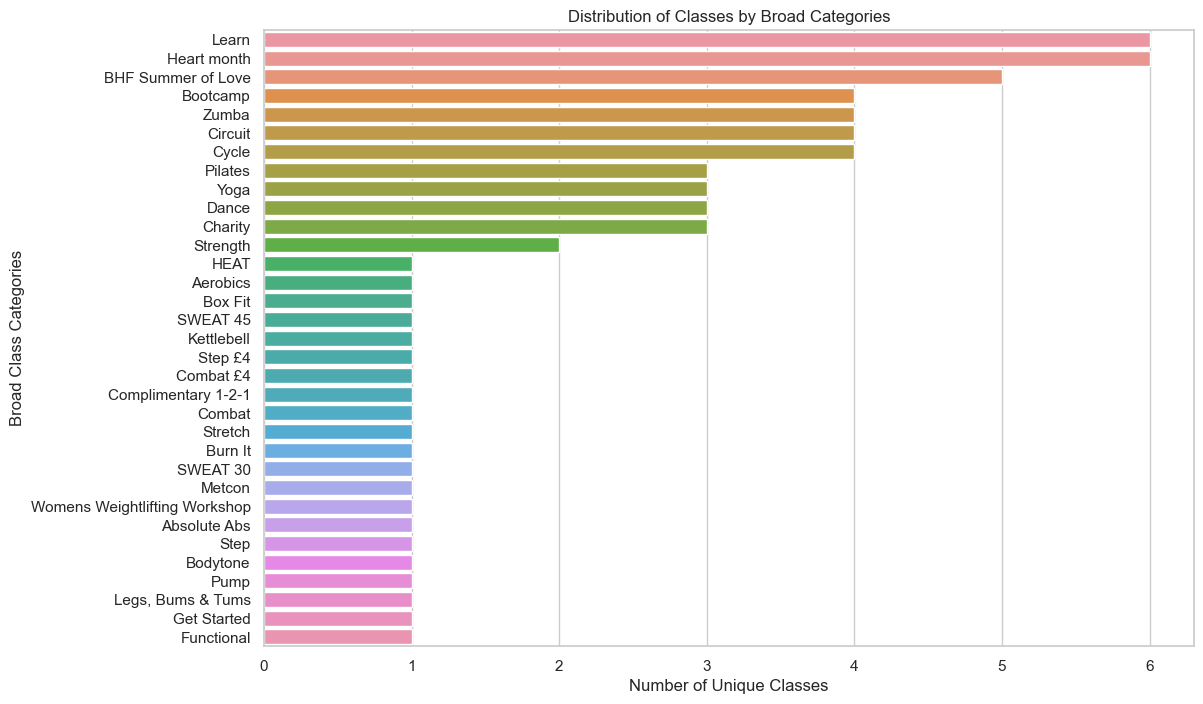

In [50]:
# Converting categories dictionary into a format suitable for visualization
data_for_visualization = {
    'Category': [],
    'Count': []
}

for category, classes in categories_by_broad_class_names.items():
    data_for_visualization['Category'].append(category)
    data_for_visualization['Count'].append(len(classes))

df_vis = pd.DataFrame(data_for_visualization)

# Sorting for better legibility
df_vis_sorted = df_vis.sort_values(by='Count', ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a barplot
sns.barplot(x='Count', y='Category', data=df_vis_sorted)

# Add plot labels and title
plt.xlabel('Number of Unique Classes')
plt.ylabel('Broad Class Categories')
plt.title('Distribution of Classes by Broad Categories')

plt.show()

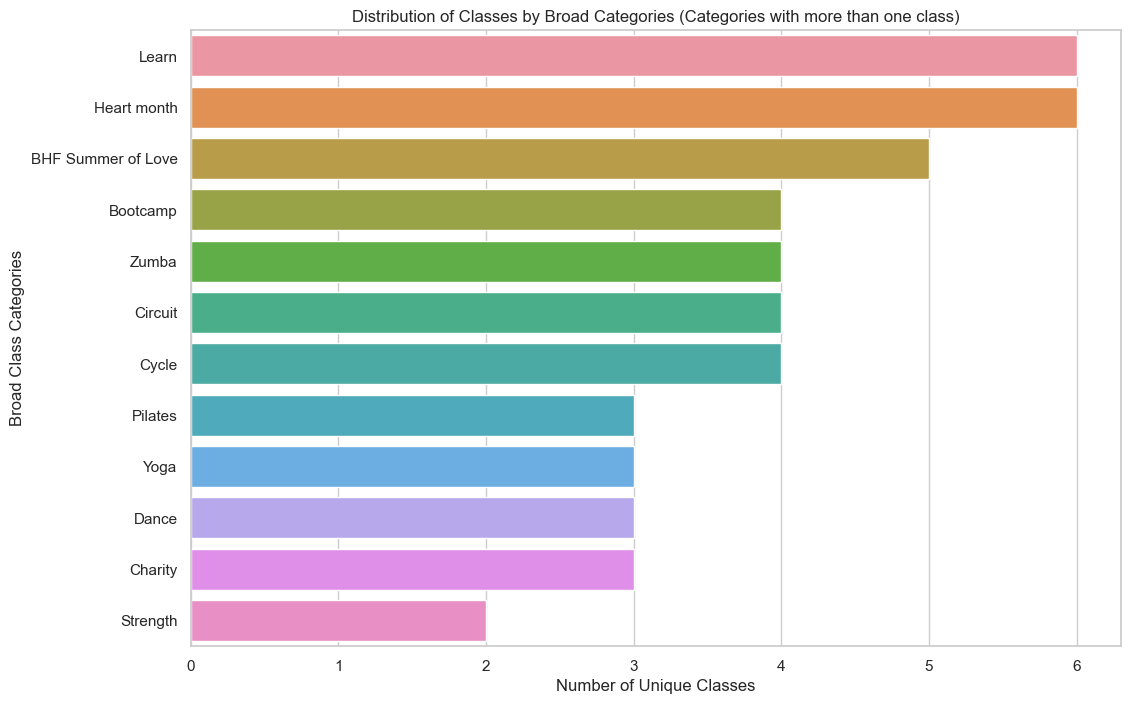

In [51]:
# Filter out categories with more than one class
df_vis_filtered = df_vis_sorted[df_vis_sorted['Count'] > 1]

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a barplot
sns.barplot(x='Count', y='Category', data=df_vis_filtered)

# Add plot labels and title
plt.xlabel('Number of Unique Classes')
plt.ylabel('Broad Class Categories')
plt.title('Distribution of Classes by Broad Categories (Categories with more than one class)')

plt.show()

#### 2.3.3 Class Participation and  Popularity Analysis

In [52]:
#Create a tally for class participation
participation_tally = class_data['participation_status'].value_counts()
# Print out the tally
print(participation_tally)

participation_status
ATTENDED        22959
CANCELLED       21628
NO SHOW         10146
BOOKED           2826
WAITING LIST     2569
Name: count, dtype: int64


In [53]:
# Create a tally for class participation
participation_tally = class_data['participation_status'].value_counts()

# Calculate the percentage of each participation status
participation_percentage = (participation_tally / 
                            participation_tally.sum()) * 100

# Print out the percentage of each participation status
print(participation_percentage)

participation_status
ATTENDED        38.183542
CANCELLED       35.969931
NO SHOW         16.874002
BOOKED           4.699973
WAITING LIST     4.272552
Name: count, dtype: float64


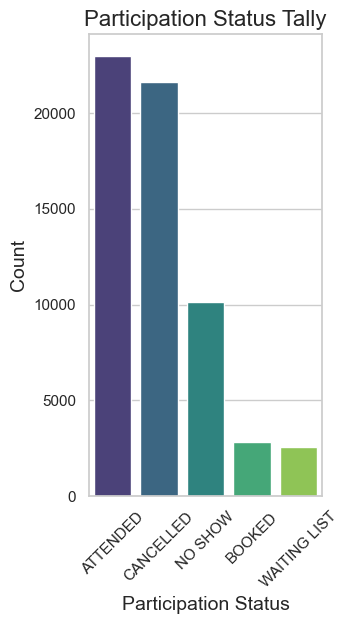

In [54]:
# Create the bar chart
plt.figure(figsize=[3, 6])
sns.barplot(x=participation_tally.index, 
            y=participation_tally.values, palette="viridis")
plt.title('Participation Status Tally', fontsize=16)
plt.xlabel('Participation Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45)  
plt.show()

state
ACTIVE       58880
CANCELLED     1248
Name: count, dtype: int64


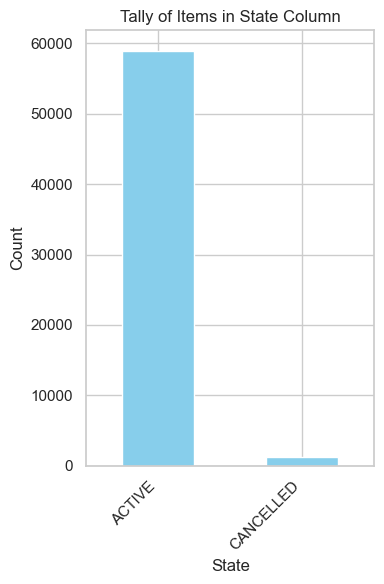

In [55]:
# Tally the class state
state_tally = class_data['state'].value_counts()
# Print the tally
print(state_tally)

# Viisualise the results
plt.figure(figsize=(4, 6))
state_tally.plot(kind='bar', color='skyblue')
plt.title('Tally of Items in State Column')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Calculate the total number of attendees for each class
class_data['total_attendees'] = class_data['female'] + class_data['male'] + class_data['unknown']

# Group by class name to sum the total attendees and the class capacities
class_grouped = class_data.groupby('class_name').agg({
    'total_attendees': 'sum',
    'class_capacity': 'sum'
}).reset_index()

# Calculate % attendance for each class
class_grouped['% attendance'] = (class_grouped['total_attendees'] / class_grouped['class_capacity']) * 100

# Round the % attendance to two decimal places
class_grouped['% attendance'] = class_grouped['% attendance'].round(2)

# Calculate the average attendance rate across all classes
average_attendance_rate = class_grouped['% attendance'].mean()

# Round the average attendance rate to two decimal places
average_attendance_rate = round(average_attendance_rate, 2)
average_attendance_rate

25.78

In [57]:
# Correcting the groupby operation to use a list for multiple column selection
status_totals = class_data.groupby(['class_name', 'participation_status'])[['female', 'male', 'unknown']].sum().reset_index()

# Filter for only 'attended' participation status
attended_status_totals = status_totals[status_totals['participation_status'] == 'ATTENDED'].reset_index(drop=True)

# No need to drop the 'index' column anymore because we used reset_index(drop=True)

# Create a new column 'charity_class' indicating if the class is a charity class
attended_status_totals['charity_class'] = attended_status_totals['class_name'].str.contains('Charity|BHF|heart month', case=False)

# Create a new column 'supplementary_class' indicating if the class is a supplementary class
attended_status_totals['supplementary_class'] = attended_status_totals['class_name'].str.contains('£', case=False)

attended_status_totals

,class_name,participation_status,female,male,unknown,charity_class,supplementary_class
0,Absolute Abs,ATTENDED,4116,784,23,False,False
1,Aerobics,ATTENDED,335,8,1,False,False
2,BHF Charity Class,ATTENDED,7,5,0,True,False
3,BHF Summer of Love – BURN IT,ATTENDED,67,2,1,True,False
4,BHF Summer of Love – CIRCUITS,ATTENDED,39,19,0,True,False
...,...,...,...,...,...,...,...
56,Yoga £4,ATTENDED,210,40,1,False,True
57,Zumba®,ATTENDED,16,0,0,False,False
58,Zumba® Step £2,ATTENDED,4,0,0,False,True
59,Zumba® £2,ATTENDED,1782,32,12,False,True


In [58]:
# Split the attended data into two groups: charity and non-charity
charity_attended = attended_status_totals[
    attended_status_totals['charity_class'] == True]
non_charity_attended = attended_status_totals[
    attended_status_totals['charity_class'] == False]

# Split the non-charity data into supplementary and non-summplementary
supplementary_attended = non_charity_attended[non_charity_attended[
    'supplementary_class'] == True]
non_supplementary_attended = non_charity_attended[
    non_charity_attended['supplementary_class'] == False]

# Print result
supplementary_attended

,class_name,participation_status,female,male,unknown,charity_class,supplementary_class
21,Combat £4,ATTENDED,0,1,0,False,True
26,Dance £4,ATTENDED,41,1,0,False,True
42,Pilates £2,ATTENDED,112,13,5,False,True
43,Pilates £4,ATTENDED,52,4,1,False,True
51,Step £4,ATTENDED,65,10,0,False,True
55,Yoga £2,ATTENDED,1498,303,9,False,True
56,Yoga £4,ATTENDED,210,40,1,False,True
58,Zumba® Step £2,ATTENDED,4,0,0,False,True
59,Zumba® £2,ATTENDED,1782,32,12,False,True
60,Zumba® £4,ATTENDED,70,1,0,False,True


In [59]:
# Calculate totals for all charity classes.
total_non_supplementary_attended = {'class_name': 'non supplementary class',
                         'participation_status': 'ATTENDED',
                         'female':non_supplementary_attended['female'].sum(),
                         'male':non_supplementary_attended['male'].sum(),
                         'unknown':non_supplementary_attended['unknown'].sum(),
                         'charity_class':'False',
                         'supplementary_class':'False'}
total_non_supplementary_attended

{'class_name': 'non supplementary class',
 'participation_status': 'ATTENDED',
 'female': 123720,
 'male': 29124,
 'unknown': 1036,
 'charity_class': 'False',
 'supplementary_class': 'False'}

In [60]:
# Calculate totals for all charity classes.
total_charity_attended = {'class_name': 'charity class',
                         'participation_status': 'ATTENDED',
                         'female':charity_attended['female'].sum(),
                         'male':charity_attended['male'].sum(),
                         'unknown':charity_attended['unknown'].sum(),
                         'charity_class':'True',
                         'supplementary_class':'False'}

total_charity_attended

{'class_name': 'charity class',
 'participation_status': 'ATTENDED',
 'female': 363,
 'male': 92,
 'unknown': 4,
 'charity_class': 'True',
 'supplementary_class': 'False'}

In [61]:
# Calculate totals for all supplementary classes.
total_supplementary_attended = {'class_name': 'supplementary class',
                         'participation_status': 'ATTENDED',
                         'female':supplementary_attended['female'].sum(),
                         'male':supplementary_attended['male'].sum(),
                         'unknown':supplementary_attended['unknown'].sum(),
                         'charity_class':'False',
                         'supplementary_class':'True'}

total_supplementary_attended

{'class_name': 'supplementary class',
 'participation_status': 'ATTENDED',
 'female': 3834,
 'male': 405,
 'unknown': 28,
 'charity_class': 'False',
 'supplementary_class': 'True'}

In [62]:
# Create lists of dictionaries for total charity and supplementary attendance
total_attendance_dicts = [non_supplementary_attended.to_dict(orient='records'),
                          [total_supplementary_attended],
                          [total_charity_attended]]

# Concatenate the lists of dictionaries and create a DataFrame
grouped_attendance = pd.concat([pd.DataFrame(dicts) for 
                                dicts in total_attendance_dicts], 
                               ignore_index=True)

# Drop unnecessary columns
grouped_attendance.drop(columns=['participation_status', 'charity_class', 
                                 'supplementary_class'], inplace=True)

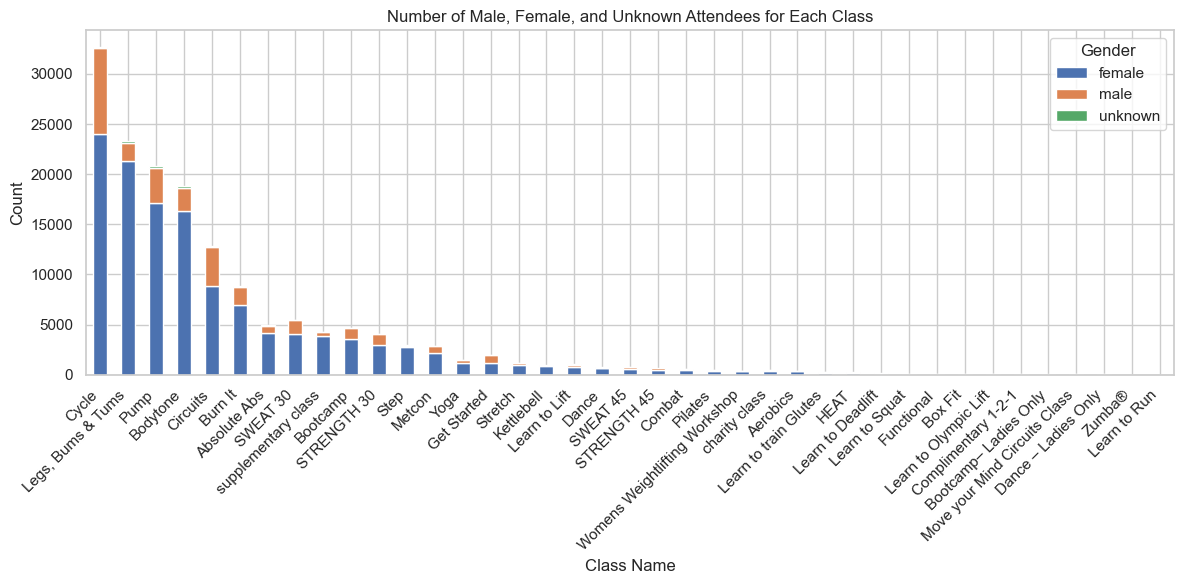

In [63]:
# Set 'class_name' as the index for better visualization
grouped_attendance.set_index('class_name', inplace=True)
grouped_attendance_sorted = grouped_attendance.sort_values(by='female', ascending=False)

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))  
grouped_attendance_sorted.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Number of Male, Female, and Unknown Attendees for Each Class')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

#### Class Popularity based on Attendace

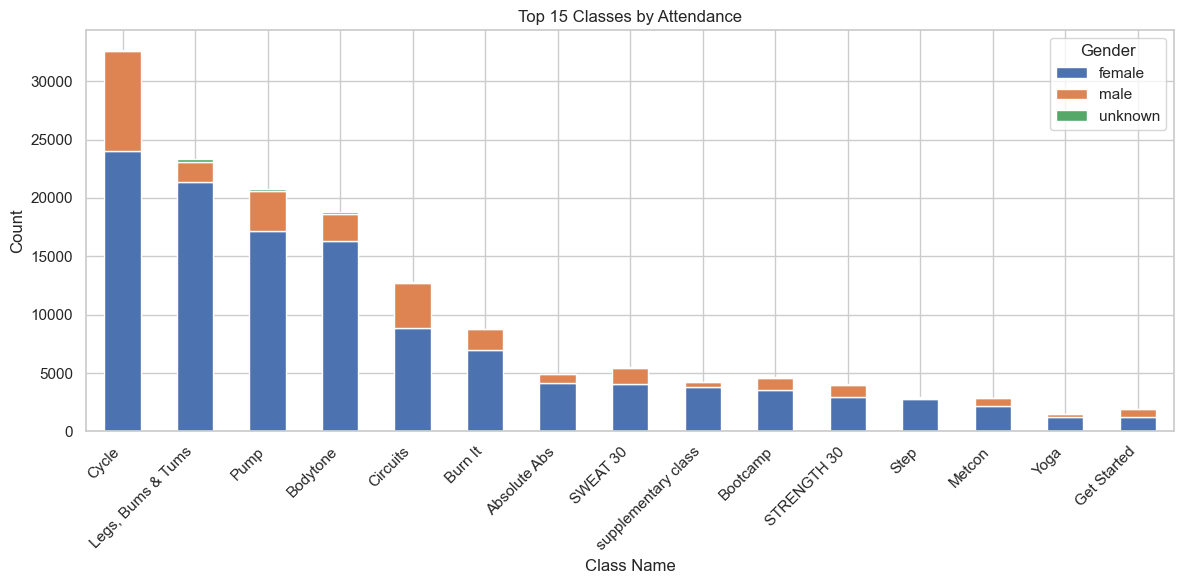

In [64]:
# Select the top 15 classes
top_15_classes = grouped_attendance_sorted.head(15)

# Plot a stacked bar chart for the top 15 classes
fig, ax = plt.subplots(figsize=(12, 6))
top_15_classes.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Top 15 Classes by Attendance')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

### Observations

> Total class attendance is highest for Cycle, Legs, Bums & Tums and Pump classes. There appears to be a higher proportion of male attendees to the Cycle, Pump and Circuits classes. 

#### 2.3.4 Time Series Analysis of Participation Status 

In [65]:
# Create new columns for month and day of the classes
class_data['day_of_week'] = class_data['start_date_time'].dt.day_name()
class_data['month'] = class_data['start_date_time'].dt.month_name()
class_data['hour_of_day'] = class_data['start_date_time'].dt.hour

In [66]:
# Define the order of months in the calendar year from Sep '22 to Aug '23'
month_order = ['September', 'October', 'November', 'December',
               'January', 'February',
               'March', 'April', 'May', 
               'June', 'July', 'August', ]

# Grouping data by month and participation status, and summing the 'total' values
monthly_totals = class_data.groupby([
    'month', 'participation_status'])[
    'total'].sum().reset_index()

# Sort the data by month according to the calendar year
monthly_totals['month'] = pd.Categorical(monthly_totals['month'], 
                                         categories=month_order, ordered=True)
monthly_totals = monthly_totals.sort_values('month')

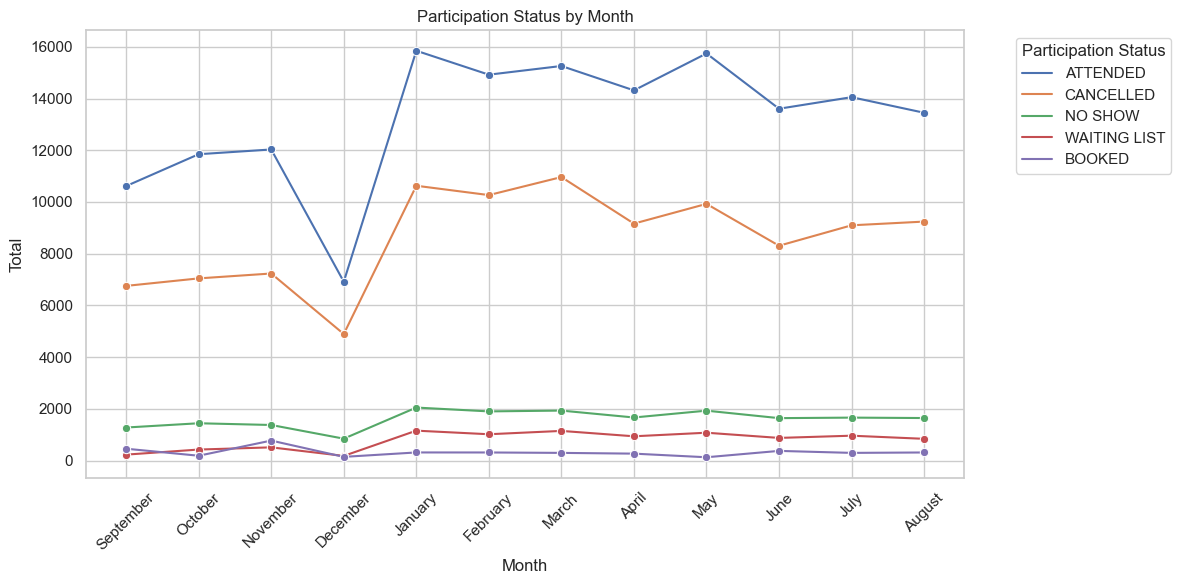

In [67]:
# Define the desired order of participation status
order = ['ATTENDED', 'CANCELLED', 'NO SHOW', 'WAITING LIST', 'BOOKED']

# Plot line graph
plt.figure(figsize=[12, 6])
sns.lineplot(data=monthly_totals, x='month', y='total', 
             hue='participation_status', 
             hue_order=order, marker='o', ci=None)
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Participation Status by Month')
plt.xticks(rotation=45)
plt.legend(title='Participation Status', 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

### Observations

> As previously seen, class attendance is highest in January with lowest attendance in December. The % of cancellations and no shows appears to follow the overall attendance trends with no specific peaks identifiable.

In [68]:
# Define the order of days
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday' ]

# Grouping data by day and participation status, and summing the 'total' values
daily_totals = class_data.groupby(['day_of_week', 'participation_status'])['total'].sum().reset_index()

# Sort the data by day according to the calendar year
daily_totals['day_of_week'] = pd.Categorical(daily_totals['day_of_week'], categories=day_order, ordered=True)
daily_totals = daily_totals.sort_values('day_of_week')

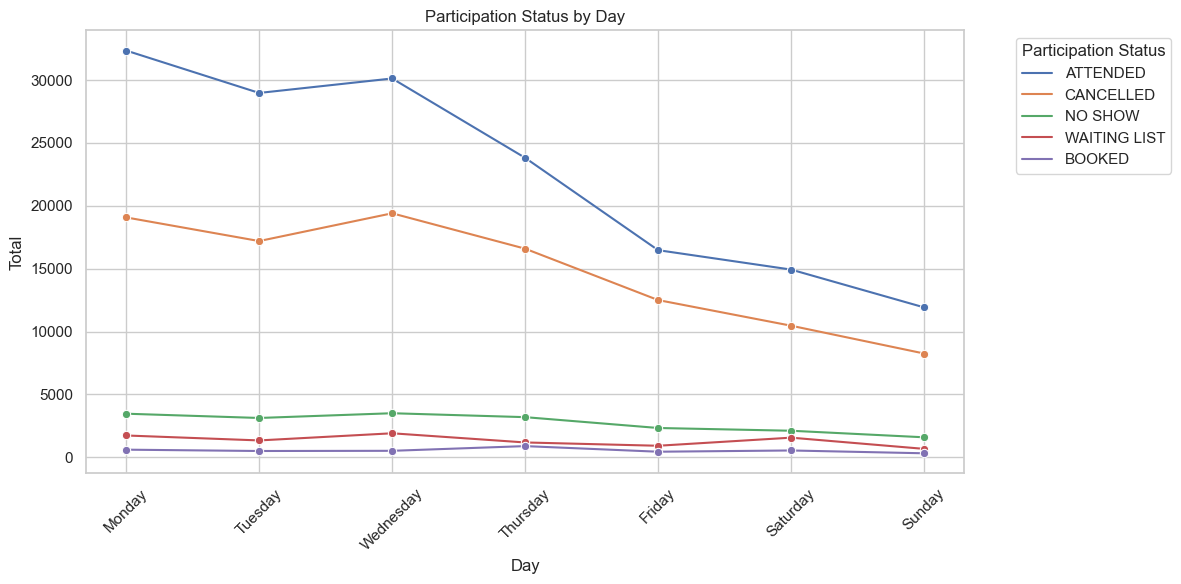

In [69]:
# Define the desired order of participation status
order = ['ATTENDED', 'CANCELLED', 'NO SHOW', 'WAITING LIST', 'BOOKED']

# Plot line graph
plt.figure(figsize=[12, 6])
sns.lineplot(data=daily_totals, x='day_of_week', y='total', hue='participation_status', 
             hue_order=order, marker='o', ci=None)
plt.xlabel('Day')
plt.ylabel('Total')
plt.title('Participation Status by Day')
plt.xticks(rotation=45)
plt.legend(title='Participation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

In [70]:
# Grouping data by houur and participation status, and summing the 'total' values
hourly_totals = class_data.groupby(['hour_of_day', 
                                    'participation_status'])['total'].sum().reset_index()

# Sort the data by month according to the calendar year
hourly_totals['hour_of_day'] = pd.Categorical(hourly_totals
                                              ['hour_of_day'], 
                                              ordered=True)
hourly_totals = hourly_totals.sort_values('hour_of_day')

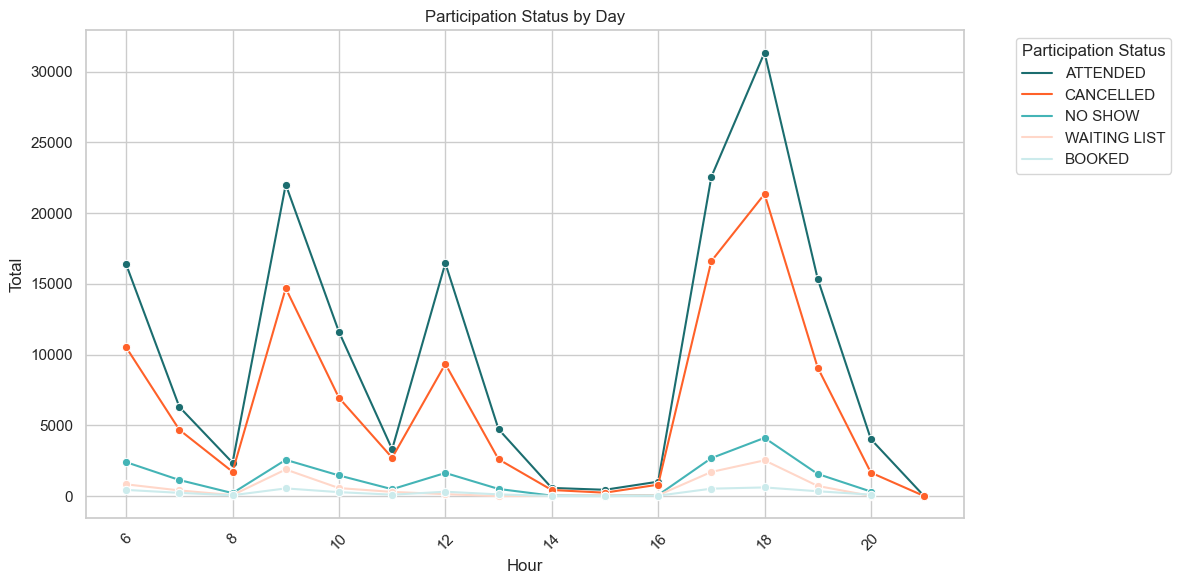

In [71]:
# Define the desired order of participation status
order = ['ATTENDED', 'CANCELLED', 'NO SHOW', 'WAITING LIST', 'BOOKED']

# Define custom colors for each participation status
custom_colors = {'ATTENDED': '#1B6D6F', 'CANCELLED': '#FF6129', 
                 'NO SHOW': '#44B4B6', 'WAITING LIST': '#FFD7C9', 
                 'BOOKED': '#CCEBEC'}

# Plot line graph
plt.figure(figsize=[12, 6])
sns.lineplot(data=hourly_totals, x='hour_of_day', y='total', hue='participation_status', 
             hue_order=order, marker='o', ci=None, palette=custom_colors)
plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Participation Status by Day')
plt.xticks(rotation=45)
plt.legend(title='Participation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

### Observations
> The chart clearly shows 3 peaks. 9am, 12pm and 6pm which clearly indicates people's preference of classes in the morning before work, during lunch time and right after work.

> Evening slots, especially around 6 PM, are the most popular times for attending classes, indicating a post-work peak in attendance.

#### 2.3.5 No Show Analysis

In [72]:
# Using a list for multiple column selection
status_totals = class_data.groupby(['class_name', 'participation_status'])[[
    'female', 'male', 'unknown']].sum().reset_index()

# Filter for only 'NO SHOW' participation status
noshow_status_totals = status_totals[status_totals[
    'participation_status'] == 'NO SHOW'].reset_index(drop=True)

# Add totals column
noshow_status_totals['total'] = noshow_status_totals[
    'female'] + noshow_status_totals['male'] + noshow_status_totals['unknown']

In [73]:
# Create a new column 'charity_class' indicating if the class is a charity class
noshow_status_totals['charity_class'] = noshow_status_totals[
    'class_name'].str.contains('Charity|BHF|heart month', case=False)

# Create a new column 'supplementary_class' indicating if the class is a supplementary class 
noshow_status_totals['supplementary_class'] = noshow_status_totals[
    'class_name'].str.contains('£', case=False)

# View the output
noshow_status_totals

,class_name,participation_status,female,male,unknown,total,charity_class,supplementary_class
0,Absolute Abs,NO SHOW,458,112,2,572,False,False
1,Aerobics,NO SHOW,28,1,0,29,False,False
2,BHF Summer of Love – BURN IT,NO SHOW,6,1,0,7,True,False
3,BHF Summer of Love – CIRCUITS,NO SHOW,2,0,0,2,True,False
4,BHF Summer of Love – CYCLE,NO SHOW,20,6,0,26,True,False
5,BHF Summer of Love – LBT,NO SHOW,1,0,0,1,True,False
6,Bodytone,NO SHOW,1818,171,15,2004,False,False
7,Bootcamp,NO SHOW,385,98,2,485,False,False
8,Bootcamp– Ladies Only,NO SHOW,6,0,0,6,False,False
9,Box Fit,NO SHOW,16,1,0,17,False,False


In [74]:
# Split the attended data into two groups: charity and non-charity
charity_noshow = noshow_status_totals[
    noshow_status_totals['charity_class'] == True]
non_charity_noshow = noshow_status_totals[
    noshow_status_totals['charity_class'] == False]

# Split the non-charity data into supplementary and non-summplementary
supplementary_noshow = noshow_status_totals[
    noshow_status_totals['supplementary_class'] == True]
non_supplementary_noshow = noshow_status_totals[
    noshow_status_totals['supplementary_class'] == False]

In [75]:
# Recalculate 'total' to ensure it's present
charity_attended['total'] = charity_attended[
    'female'] + charity_attended['male'] + charity_attended['unknown']

# Now calculate totals for all charity classes
total_charity_noshow = {
    'class_name': 'charity class',
    'participation_status': 'NO SHOW',
    'female': charity_attended['female'].sum(),
    'male': charity_attended['male'].sum(),
    'unknown': charity_attended['unknown'].sum(),
    'total': charity_attended['total'].sum(),  # This should now work as expected
    'charity_class': 'True',
    'supplementary_class': 'False'}

# View the Output
total_charity_noshow

{'class_name': 'charity class',
 'participation_status': 'NO SHOW',
 'female': 363,
 'male': 92,
 'unknown': 4,
 'total': 459,
 'charity_class': 'True',
 'supplementary_class': 'False'}

In [76]:
# Recalculate 'total' to ensure it's present
supplementary_attended['total'] = supplementary_attended[
    'female'] + supplementary_attended[
    'male'] + supplementary_attended['unknown']

# Calculate totals for all supplementary classes.
total_supplementary_noshow = {'class_name': 'supplementary class',
                         'participation_status': 'NO SHOW',
                         'female':supplementary_attended['female'].sum(),
                         'male':supplementary_attended['male'].sum(),
                         'unknown':supplementary_attended['unknown'].sum(),
                         'total':supplementary_attended['total'].sum(),
                         'charity_class':'False',
                         'supplementary_class':'True'}
# View the Output
total_supplementary_noshow

{'class_name': 'supplementary class',
 'participation_status': 'NO SHOW',
 'female': 3834,
 'male': 405,
 'unknown': 28,
 'total': 4267,
 'charity_class': 'False',
 'supplementary_class': 'True'}

In [77]:
# Correctly filtering noshow_status_totals to get non_supplementary_noshow as a DataFrame
non_supplementary_noshow = noshow_status_totals[noshow_status_totals['supplementary_class'] == False]
# Concatenate the DataFrame objects into one
grouped_noshow = pd.concat([
    charity_noshow, 
    non_charity_noshow,
    supplementary_noshow, 
    pd.DataFrame(list(non_supplementary_noshow))  # Convert the set to DataFrame if it's unavoidable
], ignore_index=True)
# View the Output
grouped_noshow

,class_name,participation_status,female,male,unknown,total,charity_class,supplementary_class,0
0,BHF Summer of Love – BURN IT,NO SHOW,6.0,1.0,0.0,7.0,True,False,NaN
1,BHF Summer of Love – CIRCUITS,NO SHOW,2.0,0.0,0.0,2.0,True,False,NaN
2,BHF Summer of Love – CYCLE,NO SHOW,20.0,6.0,0.0,26.0,True,False,NaN
3,BHF Summer of Love – LBT,NO SHOW,1.0,0.0,0.0,1.0,True,False,NaN
4,Charity CycleClass,NO SHOW,2.0,2.0,0.0,4.0,True,False,NaN
...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,total
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charity_class


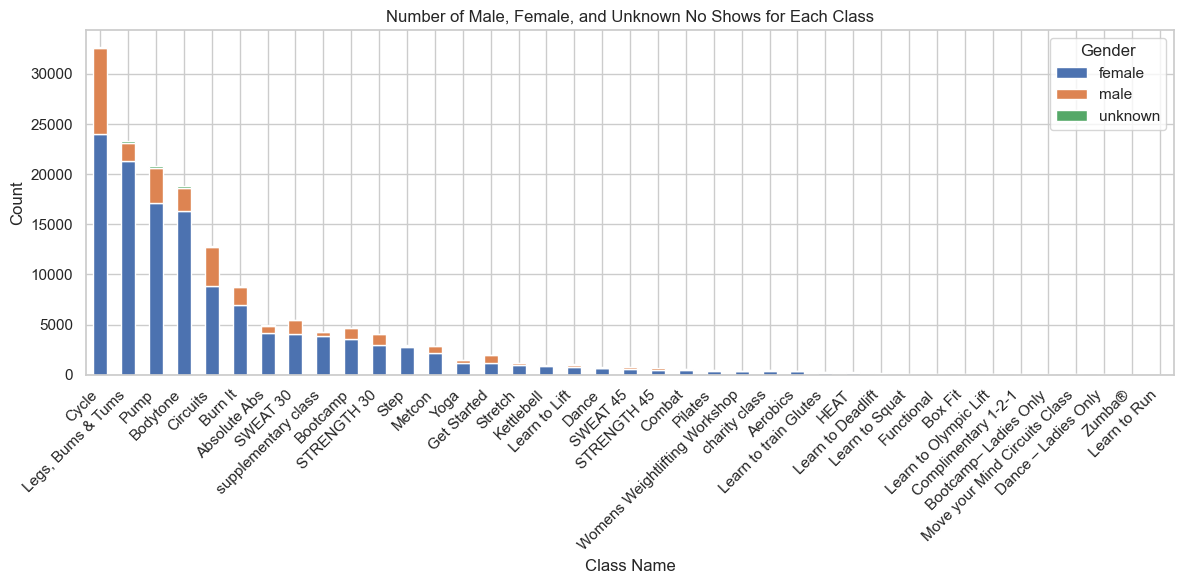

In [78]:
# Set 'class_name' as the index for better visualization
grouped_noshow.set_index('class_name', inplace=True)

grouped_noshow_sorted = grouped_attendance.sort_values(by='female', ascending=False)

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))  
grouped_attendance_sorted.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.title('Number of Male, Female, and Unknown No Shows for Each Class')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [79]:
# If no shows were charged £1, £2 or 50p 
noshow_charge_1 = noshow_status_totals['total'].sum()

noshow_charge_2 = noshow_status_totals['total'].sum() *2 

noshow_charge_50 = noshow_status_totals['total'].sum()/2

# Create data set 
data = {'charge': ['£1' ,'£2', '50p'],
       'revenue': [noshow_charge_1, noshow_charge_2, noshow_charge_50]}

# Set as dataframe
noshow_charges=pd.DataFrame(data)

# View dataframe
noshow_charges

,charge,revenue
0,£1,19348.0
1,£2,38696.0
2,50p,9674.0


### Observations and Recommendations to handle No Shows

> No shows follow a very similar pattern by class and gender as the attendace data, suggesting that there are no specific causes or trends in no shows. 
 
> Recommendations: 
> If No shows were charged even 50p per no show, PureGym could generate an additional £9,674 annually, with £2 per no show generating almost £40,000 in additional revenue. PureGym could consider conducting additional research on no show charging to test trade offs between retention and revenue for no shows. Additionally, no show charges could be excluded from student or premium accounts to encourage sign ups on those plans. 

### 2.4 Class Schedule and Timetable Analysis

In [80]:
# Converting start_date_time to datetime to extract the hour and day of the week
class_data['start_date_time'] = pd.to_datetime(class_data['start_date_time'])

# Adding new columns for hour of day and day of week for further analysis
class_data['hour_of_day'] = class_data['start_date_time'].dt.hour
class_data['day_of_week'] = class_data['start_date_time'].dt.day_name()

In [81]:
# Grouping data by class name, hour of day, and day of week, and calculate the sum of attended
attendance_summary = class_data[class_data[
    'participation_status'] == 'ATTENDED'].groupby(
    ['class_name', 'day_of_week', 'hour_of_day']
)[['male', 'female']].sum()

attendance_summary['total_attended'] = attendance_summary.sum(axis=1)

# View the output
attendance_summary

male  female  total_attended
class_name   day_of_week hour_of_day                              
Absolute Abs Friday      7              10     206             216
                         9               0       8               8
                         10              4      22              26
                         12             15      28              43
                         14             19      93             112
...                                    ...     ...             ...
Zumba® £2    Wednesday   19              7     198             205
                         20              0      43              43
Zumba® £4    Monday      19              1      41              42
             Thursday    19              0      22              22
             Wednesday   19              0       7               7

[856 rows x 3 columns]

In [82]:
# Get the overall peak attendance times regardless of class
overall_peak_times = class_data[class_data[
    'participation_status'] == 'ATTENDED'].groupby(
    ['day_of_week', 'hour_of_day']
)[['male', 'female']].sum()

overall_peak_times['total_attended'] = overall_peak_times.sum(axis=1)
overall_peak_times = overall_peak_times[
    'total_attended'].reset_index()

#View the Output
overall_peak_times

,day_of_week,hour_of_day,total_attended
0,Friday,6,2929
1,Friday,7,1632
2,Friday,8,93
3,Friday,9,2293
4,Friday,10,858
...,...,...,...
85,Wednesday,16,48
86,Wednesday,17,4979
87,Wednesday,18,8736
88,Wednesday,19,4200


In [83]:
# Counting the number of Unique classes present in the timetable
unique_class_timetable_names = timetable_data["class_name"].unique()
# View the output
print(unique_class_timetable_names)

# Count the number of unique classes in the timetable dataset
unique_classes_timetable_count = timetable_data['class_name'].nunique()
unique_classes_timetable_count

['Pump' 'Yoga' 'LBT' 'Bodytone' 'Cycle-1' 'Combat' 'Step' 'Zumba'
 'Pilates' 'Bootcamp' 'SWEAT' 'Circuits' 'Burn It' 'Dance' 'HEAT'
 'Aerobics' 'STRENGTH']


17

In [84]:
# Define a dictionary mapping original values to their replacements
replacement_dict = {
    'Cycle-1': 'Cycle',
    'LBT': 'Legs, Bums & Tums',
    # Add more mappings as needed
}

# Replace values in the array with different spellings
unique_class_timetable_names_modified = [
    replacement_dict[value] if value in replacement_dict 
    else value for value in unique_class_timetable_names]

# Print the modified array
print(unique_class_timetable_names_modified)

['Pump', 'Yoga', 'Legs, Bums & Tums', 'Bodytone', 'Cycle', 'Combat', 'Step', 'Zumba', 'Pilates', 'Bootcamp', 'SWEAT', 'Circuits', 'Burn It', 'Dance', 'HEAT', 'Aerobics', 'STRENGTH']


In [85]:
# Define a dictionary mapping original values to their replacements
replacement_dict = {
    'Cycle-1': 'Cycle',
    'LBT': 'Legs, Bums & Tums',
    'STRENGTH': 'STRENGTH 30',
    'SWEAT': 'SWEAT 30'
    # Add more mappings as needed
}

# Apply the replacement using the dictionary
timetable_data['class_name'] = timetable_data[
    'class_name'].replace(replacement_dict)

# Now, extract and print the updated unique class names
unique_timetable_class_names_updated = timetable_data[
    'class_name'].unique()

# Print each updated unique class name
print("Updated Classes in the Timetable:")
for class_name in unique_timetable_class_names_updated:
    print(class_name)

Updated Classes in the Timetable:
Pump
Yoga
Legs, Bums & Tums
Bodytone
Cycle
Combat
Step
Zumba
Pilates
Bootcamp
SWEAT 30
Circuits
Burn It
Dance
HEAT
Aerobics
STRENGTH 30


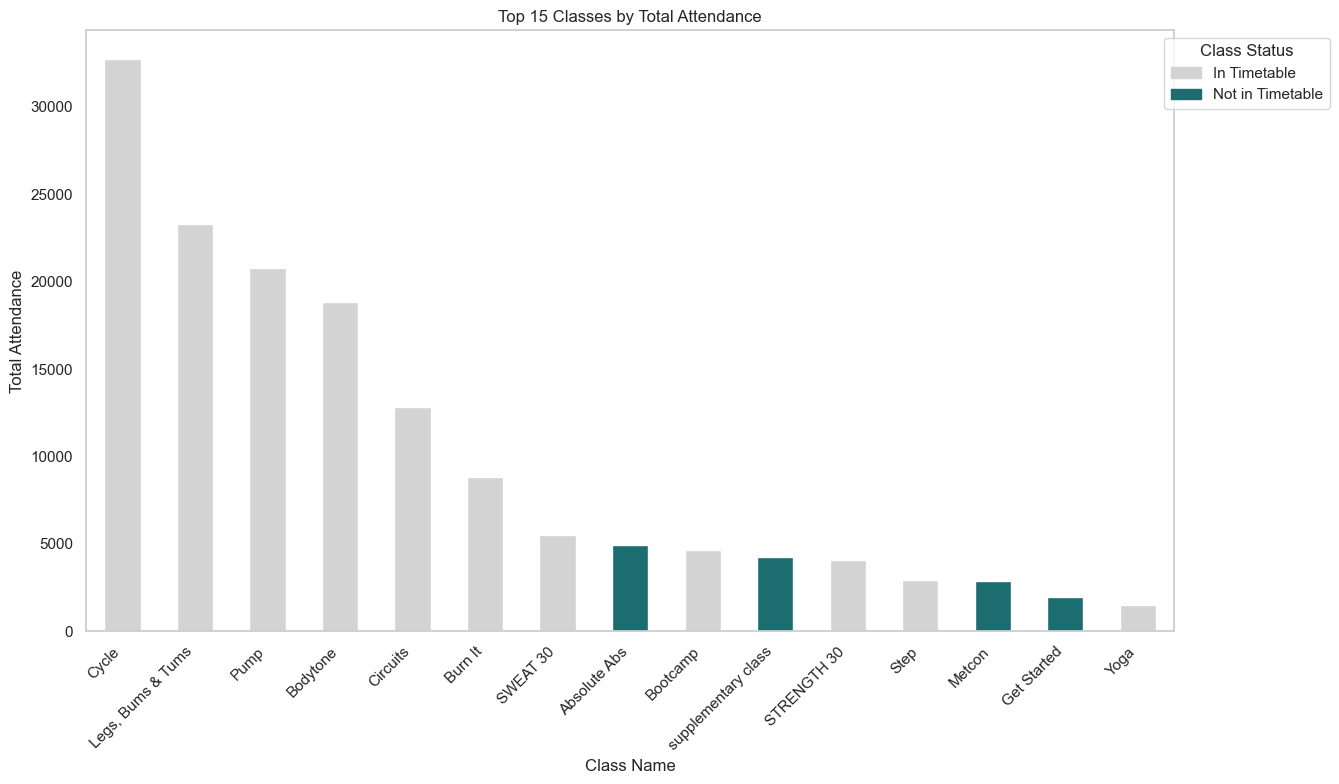

In [86]:
# Deffining the Total Attendance
grouped_attendance_sorted['total_attendance']  = grouped_attendance_sorted[
    'female']+grouped_attendance_sorted[
    'male']+grouped_attendance_sorted['unknown']


# Extract the top 15 classes based on total attendance
top_15_classes_total = grouped_attendance_sorted.nlargest(15, 'total_attendance')

# Create a set of classes currently in the timetable for comparison
timetable_classes = set(timetable_data['class_name'])

# Adding a new column to indicate if a class is in the timetable
top_15_classes_total['in_timetable'] = top_15_classes_total.index.isin(timetable_classes)

# Now plot a bar chart for the top 15 classes by total attendance
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['lightgrey' if in_timetable else '#1B6D6F' 
          for in_timetable in top_15_classes_total['in_timetable']]
top_15_classes_total['total_attendance'].plot(
    kind='bar', ax=ax, color=colors)

# Customize the plot
plt.xlabel('Class Name')
plt.ylabel('Total Attendance')
plt.title('Top 15 Classes by Total Attendance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgrey', 
                         edgecolor='lightgrey', 
                         label='In Timetable'),
                   Patch(facecolor='#1B6D6F', 
                         edgecolor='#1B6D6F', 
                         label='Not in Timetable')]
plt.legend(handles=legend_elements, title='Class Status', 
           bbox_to_anchor=(1.15, 1))

# Remove gridlines
plt.grid(False)
plt.show()


In [87]:
# Finding successful clases not included in the timetable
# Unique classes from class_data
unique_classes_class_data = set(class_data['class_name'].unique())

# Unique classes from timetable_data
unique_classes_timetable_data = set(timetable_data['class_name'].unique())

# Successful classs is define success based on total attendance
# For simplicity, consider the top attended classes as successful for this analysis
class_attendance_counts = class_data[class_data['participation_status'] == 'ATTENDED'].groupby('class_name')['total'].sum()
successful_classes = set(class_attendance_counts[class_attendance_counts > class_attendance_counts.median()].index)

# Classes that are successful but not included in the suggested timetable
successful_not_in_timetable = successful_classes.difference(unique_class_timetable_names_modified)

successful_not_in_timetable

{'Absolute Abs',
 'Get Started',
 'Kettlebell',
 'Learn to Deadlift',
 'Learn to Lift',
 'Learn to train Glutes',
 'Metcon',
 'STRENGTH 30',
 'STRENGTH 45',
 'SWEAT 30',
 'SWEAT 45',
 'Stretch',
 'Womens Weightlifting Workshop',
 'Yoga £2',
 'Yoga £4',
 'Zumba® £2'}

In [88]:
# Define the values you want to remove from the set
values_to_remove = {'STRENGTH 30', 'STRENGTH 45', 'SWEAT 30', 'SWEAT 45', 'Yoga £2', 'Yoga £4', 'Zumba® £2'}

# Remove the specified values from the set
successful_not_in_timetable_modified = successful_not_in_timetable.difference(values_to_remove)

# View the updated list
successful_not_in_timetable_modified

{'Absolute Abs',
 'Get Started',
 'Kettlebell',
 'Learn to Deadlift',
 'Learn to Lift',
 'Learn to train Glutes',
 'Metcon',
 'Stretch',
 'Womens Weightlifting Workshop'}

In [89]:
# Looking at the attendance to compare popularity
# Convert class_attendance_counts to a DataFrame
attendance_counts_df = pd.DataFrame(class_attendance_counts).reset_index()
attendance_counts_df.columns = ['class_name', 'attendance_count']

# Filter successful classes that are not in the timetable
successful_not_in_timetable_df = pd.DataFrame({
    'class_name': list(successful_not_in_timetable_modified)})

# Merge successful_not_in_timetable_df sorted by attendance_counts_df
successful_not_in_timetable_with_counts = successful_not_in_timetable_df.merge(
    attendance_counts_df, on='class_name', how='left')
successful_not_in_timetable_with_counts = successful_not_in_timetable_with_counts.sort_values(
    by='attendance_count', ascending=False)

successful_not_in_timetable_with_counts

,class_name,attendance_count
7,Absolute Abs,4923
2,Metcon,2878
8,Get Started,1957
6,Stretch,1164
0,Learn to Lift,1023
4,Kettlebell,971
5,Womens Weightlifting Workshop,417
1,Learn to train Glutes,227
3,Learn to Deadlift,171


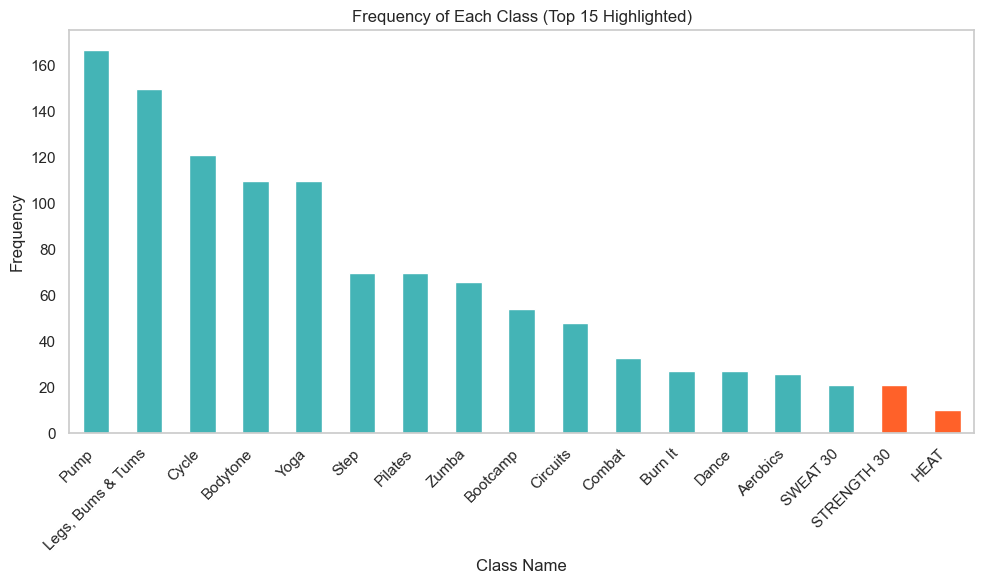

In [90]:
# Frequency of Each Class
class_frequency = timetable_data['class_name'].value_counts()

# Get the names of the top 15 classes
top_15_class_names = class_frequency.head(15).index

# Colors: classes in the top 15 will be colored blue, others in red
colors = ['#44B4B6' if class_name in top_15_class_names else '#FF6129' for class_name in class_frequency.index]

# Plotting with color differentiation
class_frequency.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Frequency of Each Class (Top 15 Highlighted)')
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Remove gridlines
plt.grid(False)
plt.show()

In [91]:
# Comparison between classes included and not included
# Classes that are successful and included in the suggested timetable
successful_in_timetable = successful_classes.difference(successful_not_in_timetable_modified)

# Filter successful classes that are in the timetable
successful_in_timetable_df = pd.DataFrame({'class_name': list(successful_in_timetable)})

# Merge successful_in_timetable_df sorted by attendance_counts_df on 'class_name'
successful_in_timetable_with_counts = successful_in_timetable_df.merge(attendance_counts_df, on='class_name', how='left')
successful_in_timetable_with_counts = successful_in_timetable_with_counts.sort_values(by='attendance_count', ascending=False)

successful_in_timetable_with_counts

,class_name,attendance_count
0,Cycle,32717
6,"Legs, Bums & Tums",23305
1,Pump,20781
18,Bodytone,18835
2,Circuits,12803
15,Burn It,8811
7,SWEAT 30,5498
3,Bootcamp,4652
13,STRENGTH 30,4062
10,Step,2929


#### Observations

> When comparing attendance of classes that are in the recommended timetable vs others that are not, Absolute Abs Metcon and Get started stand out as successful classes that could be added to the recommended timetable. 


<font color='blue'>Additional Analysis on the Schdeuling Conflicts, Underperforming classes Insights are available in the Additional Analysis Notebook included in the analytics package.</font>


## Section 3: In-Depth Analytical Models

### 3.1 K Means Cluster Analysis

#### Defining the Optimmal Number of Clusters

In [92]:
# Setting Up the libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

#### Data Preparation and Scaling 

In [93]:
# Aggregate to get visit frequency
visit_freq = visit_data.groupby(['center_id', 'age', 'gender'], 
                                as_index=False).size().rename(columns={'size':'visit_frequency'})

# Data Scaling
scaler = StandardScaler()
features = visit_freq[['age', 'visit_frequency']]
features_scaled = scaler.fit_transform(features)

# Scaling the Features:
# We apply StandardScaler to normalize the features 'age' and 'visit_frequency' to have zero mean and unit variance.
# This is essential in K-means clustering, as it relies on distances between data points for clustering. 
# Scaling ensures each feature contributes equally, preventing bias toward features with larger scale and improving cluster accuracy.

#### Defining the Optimmal Number of Clusters

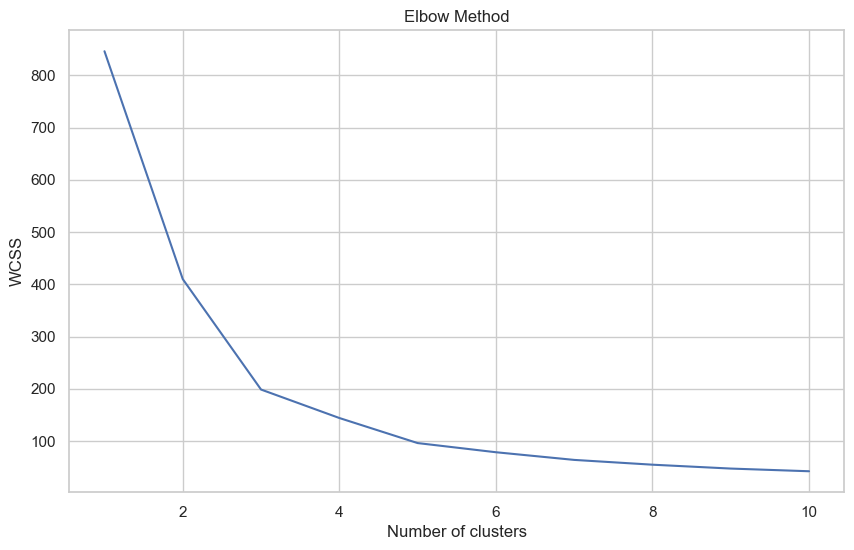

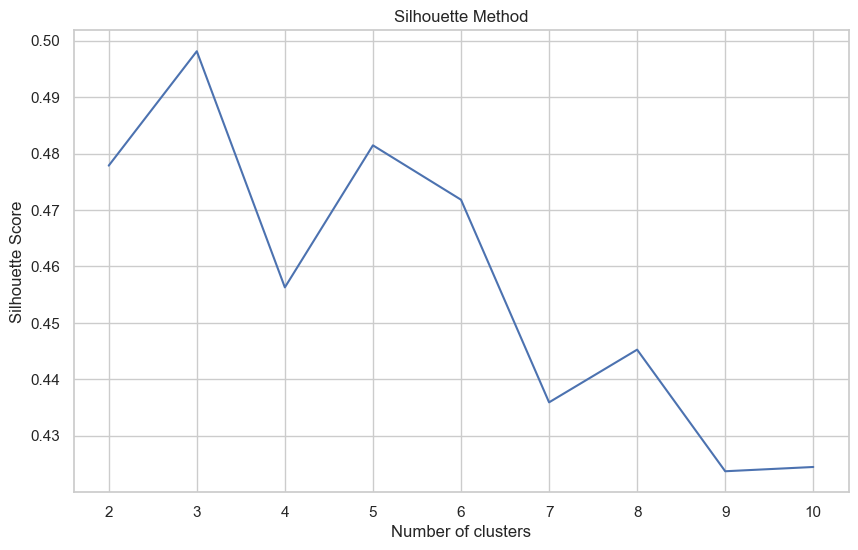

In [94]:
# Clustering Analysis
# Using the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_scaled, 
                                              cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Applying K-means Clustering

In [95]:
# Applying K-means Clustering with Optimal Cluster Number (Assuming 3 from Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
visit_freq['cluster'] = kmeans.fit_predict(features_scaled)

#### Visualisations

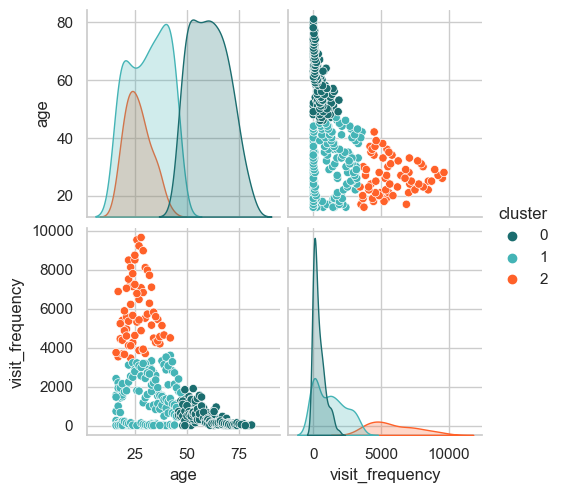

In [98]:
# Plotting the clusters
custom_palette = ['#1B6D6F', '#44B4B6', '#FF6129']

# Using pair plot to visualize the relationships among 'age' and 'visit_frequency'
sns.pairplot(visit_freq, hue='cluster', 
             vars=['age', 'visit_frequency'], 
             palette=custom_palette)
plt.show()

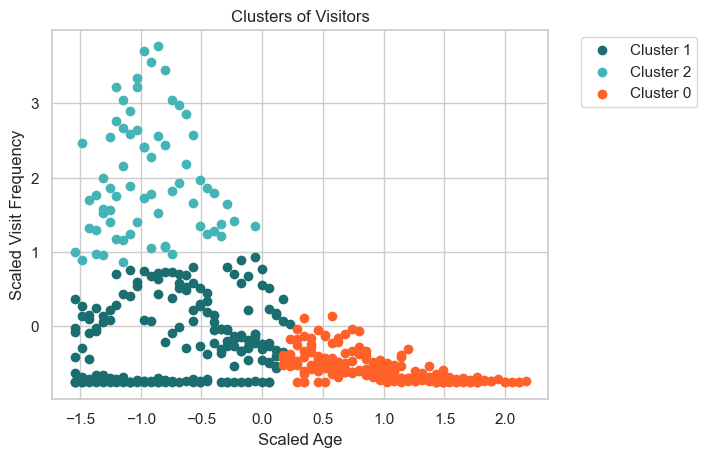

In [99]:
# Plotting the clusters
colors = ['#1B6D6F', '#44B4B6', '#FF6129']
for cluster, color in zip(visit_freq['cluster'].unique(), colors):
    cluster_group = features_scaled[visit_freq['cluster'] == cluster]
    plt.scatter(cluster_group[:, 0], cluster_group[:, 1], c=color, 
                label=f'Cluster {cluster}')
plt.title('Clusters of Visitors')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Visit Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

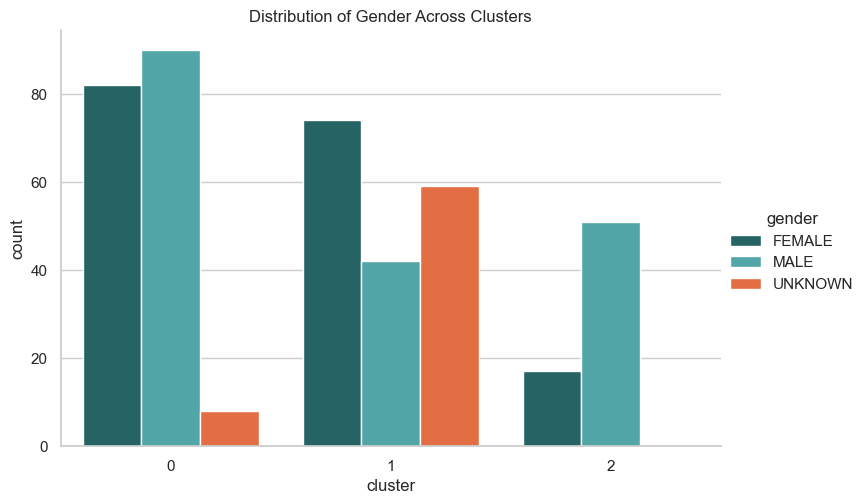

In [100]:
# Visualising the Gender Distribution for each cluster
sns.catplot(x='cluster', kind='count', hue='gender', 
            data=visit_freq, aspect=1.5, 
            palette=colors)
plt.title('Distribution of Gender Across Clusters')
plt.show()

### Observations and Strategies for Identified Member clusters

#### Cluster 0: Casual Users
- **Characteristics**: Predominantly female, diverse age range, infrequent and sporadic gym attendance.
- **Strategies**:
  - **Flexible Memberships**: Introduce pay-per-visit options to accommodate their unpredictable gym usage.
  - **Introductory Programs**: Launch programs designed to encourage short-term, regular attendance with the goal of transitioning casual users to regular members.
  - **Targeted Communications**: Use targeted marketing to promote classes and services that cater to various ages and fitness levels, enhancing the gym's accessibility and appeal.

#### Cluster 1: Emerging Enthusiasts
- **Characteristics**: Balanced gender mix, members are integrating fitness into their lifestyles, potential to become regulars or drop out.
- **Strategies**:
  - **Personalized Onboarding**: Enhance the onboarding experience with personalized workout plans and group classes to help establish consistent workout routines.
  - **Community Building**: Foster a community atmosphere through social events and workout groups, leveraging their social motivations.
  - **Rewards Program**: Develop a rewards program to incentivize consistent attendance, offering tangible benefits that attract this demographic.

#### Cluster 2: Dedicated Regulars
- **Characteristics**: Predominantly younger males, high frequency of gym visits, highly committed to fitness.
- **Strategies**:
  - **Loyalty Program**: Implement a loyalty program that rewards consistent attendance with exclusive benefits.
  - **Advanced Offerings**: Provide advanced classes and specialized equipment tailored for members looking to progress in their fitness journey.
  - **Community Engagement**: Build a strong community through clubs and events that allow members to share their passion and expertise in fitness.


### 3.2 Sentiment Analysis

Conduct sentiment analysis on member reviews to categorise sentiments as positive, neutral, or negative.
Identify recurring themes in negative feedback and areas for improvement in class offerings.
Use sentiment analysis results to enhance class scheduling, instructor training, and program development.


In [101]:
# Scrape reviews from TrustPilot 
from time import sleep
import requests
# from google.colab import files
import pandas as pd
from bs4 import BeautifulSoup

def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text())

users = []
userReviewNum = []
ratings = []
locations = []
dates = []
reviews = []

from_page = 1
to_page = 10
company = 'www.puregym.com'

for i in range(from_page, to_page+1):
    result = requests.get(fr"https://www.trustpilot.com/review/{company}?page={i}")
    soup = BeautifulSoup(result.content)

   # Trust Pilot was setup in a way that's not friendly to scraping, so this hacky method will do.
    soup2list(soup.find_all('span', {'class','typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
    soup2list(soup.find_all('div', {'class','typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), locations)
    soup2list(soup.find_all('span', {'class','typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l'}), userReviewNum)
    soup2list(soup.find_all('div', {'class','styles_reviewHeader__iU9Px'}), dates)
    soup2list(soup.find_all('div', {'class','styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
    soup2list(soup.find_all('div', {'class','styles_reviewContent__0Q2Tg'}), reviews)

   # To avoid throttling
    sleep(1)
    
# Ensure all arrays have the same length
min_length = min(len(users), len(userReviewNum), len(ratings), len(locations), len(dates), len(reviews))
users = users[:min_length]
userReviewNum = userReviewNum[:min_length]
ratings = ratings[:min_length]
locations = locations[:min_length]
dates = dates[:min_length]
reviews = reviews[:min_length]

# Create DataFrame
review_data = pd.DataFrame({
    'Username': users,
    'Total reviews': userReviewNum,
    'location': locations,
    'date': dates,
    'content': reviews,
    'Rating': ratings
})

In [102]:
# View the review dataframe
review_data.head()

,Username,Total reviews,location,date,content,Rating
0,Jane Teacher,28K reviews,GB,19 hours ago,Absolutely excellent Been a member of pure gym...,5
1,F N,15K reviews,GB,A day agoVerified,Quick And Easy To Sign Upto To PureGym Members...,4
2,Claire Peck,690 reviews,GB,A day agoVerified,"Nice largeNice large, spacious gym. Everyone w...",5
3,Beracahmusic International Min,6 reviews,GB,15 hours ago,The customer service is next to noneThe custom...,5
4,David,1 review,GB,3 days agoVerified,Happy gymI love PureGym I just recently joined...,5


In [103]:
# View the review dataframe
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Username       200 non-null    object
 1   Total reviews  200 non-null    object
 2   location       200 non-null    object
 3   date           200 non-null    object
 4   content        200 non-null    object
 5   Rating         200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


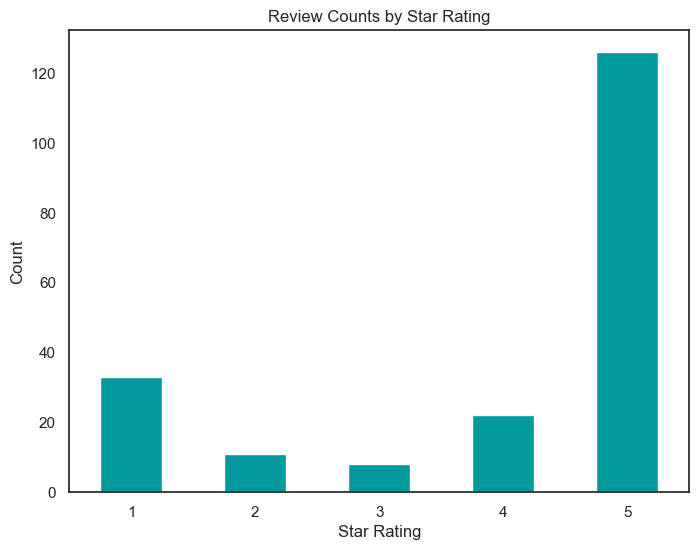

In [104]:
# Group by rating value. 
rating_counts = review_data['Rating'].value_counts().sort_index()

# Plot the count of the ratings
sns.set_style('white')
plt.figure(figsize=(8, 6)) 
rating_counts.plot(kind='bar', color='#029A9E')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Review Counts by Star Rating')
plt.xticks(rotation=0)
plt.show()

### Observations
> When looking at ratings specific to mentions of 'classes' or 'group exercise' there is a higher proportion of 5 star reviews suggesting more positive perception of PureGym for members that use the classes. 

> Overall PureGym ratings are mostly 5 stars, with a lower proportion of neutral ratings (2-4) expected due to selection bias of those who are motivated to leave reviews. 

In [105]:
# Change all text to lower case and join the elements with a space.
review_data['content_sentiment']=review_data['content']\
.apply(lambda x: " ".join(x.lower() for x in x.split()))

# Replace punctuation
review_data['content_sentiment']=review_data['content_sentiment'].str.replace('[^\w\s]','')

# View the output. 
review_data['content_sentiment'].head()

0    absolutely excellent been a member of pure gym...
1    quick and easy to sign upto to puregym members...
2    nice largenice large, spacious gym. everyone w...
3    the customer service is next to nonethe custom...
4    happy gymi love puregym i just recently joined...
Name: content_sentiment, dtype: object

In [106]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and alphanumeric characters
def preprocess_text(text):
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords and alphanumeric characters
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    
    # Join the filtered tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'content_sentiment' column
review_data['content_sentiment'] = review_data['content_sentiment'].apply(preprocess_text)

# View the output
review_data['content_sentiment'].head()

0    absolutely excellent member pure gym finchley ...
1    quick easy sign upto puregym membership online...
2    nice largenice spacious everyone friendly will...
3    customer service next nonethe customer service...
4    happy gymi love puregym recently joined anythi...
Name: content_sentiment, dtype: object

In [107]:
# Define a function to extract a polarity and subjectivity score for the reviews.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [108]:
# Populate a new column with polarity and sensitivity scores for each review and summary.
review_data['review_polarity'] = review_data['content_sentiment'].apply(generate_polarity)
review_data['review_sensitivity'] = review_data['content_sentiment'].apply(generate_subjectivity)

review_data.head()

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
0,Jane Teacher,28K reviews,GB,19 hours ago,Absolutely excellent Been a member of pure gym...,5,absolutely excellent member pure gym finchley ...,0.353571,0.525000
1,F N,15K reviews,GB,A day agoVerified,Quick And Easy To Sign Upto To PureGym Members...,4,quick easy sign upto puregym membership online...,0.293333,0.386667
2,Claire Peck,690 reviews,GB,A day agoVerified,"Nice largeNice large, spacious gym. Everyone w...",5,nice largenice spacious everyone friendly will...,0.306944,0.630556
3,Beracahmusic International Min,6 reviews,GB,15 hours ago,The customer service is next to noneThe custom...,5,customer service next nonethe customer service...,0.166667,0.296296
4,David,1 review,GB,3 days agoVerified,Happy gymI love PureGym I just recently joined...,5,happy gymi love puregym recently joined anythi...,0.475000,0.556250


Text(0.5, 1.0, 'Review: Sentiment sensitivity')

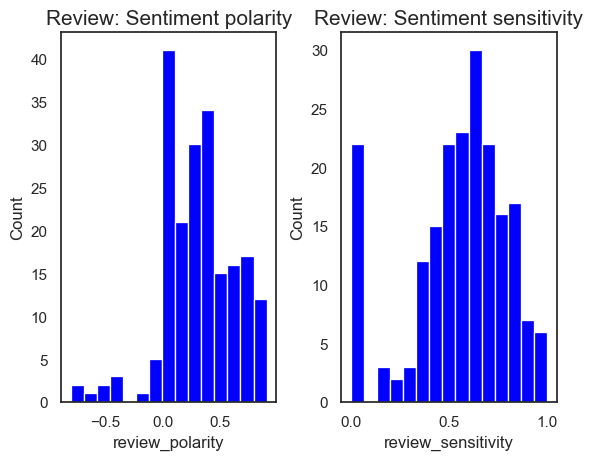

In [109]:
# Create an empty plot for the histograms.
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('whitegrid')

# Set the padding between the subplots in the figure.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

# Define the bars for each plot
sns.histplot(data=review_data, x='review_polarity', bins=15, facecolor='blue', ax=axs[0])\
.set_title('Review: Sentiment polarity', fontsize = 15)

sns.histplot(data=review_data, x='review_sensitivity', bins=15, facecolor='blue', ax=axs[1])\
.set_title('Review: Sentiment sensitivity', fontsize = 15)

In [110]:
# Create a DataFrame.
positive_reviews = review_data.nlargest(10, 'review_polarity')

# Set display options
pd.set_option('display.max_colwidth', None)  # Display full column width
pd.set_option('display.max_rows', None)  # Display all rows

positive_reviews.head(10)

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
18,hellen hudson,1 review,GB,2 days agoVerified,"I had the opportunity to go as a guest…I had the opportunity to go as a guest to puregym and was very impressed with the range of equipment and how well it was all set out. Had a great workout very impressed. I'm now looking into joining myself!Date of experience: April 20, 2024",5,opportunity go opportunity go guest puregym impressed range equipment well set great workout looking joining april,0.9,0.875
119,customer,5 reviews,GB,1 days agoVerified,"The reviewAmazing environment. Lots of equipment. A brilliant gym overall.Date of experience: April 20, 2024",5,reviewamazing lots brilliant gym april,0.9,1.000
188,Den Bangit,1 review,GB,14 hours ago,"Brilliant serviceDate of experience: April 21, 2024",5,brilliant servicedate april,0.9,1.000
121,customer from California,3 reviews,US,4 days agoVerified,"Great gym in a great locationGreat gym in a great location. Loved the Spin class. Gary(?) was awesome and tough, in a good way 👏 Date of experience: April 17, 2024",5,great gym great locationgreat gym great loved spin awesome good way date april,0.8,0.775
91,Epi,2 reviews,GB,A day agoVerified,"Great atmosphere plus its cleanGreat atmosphere plus its clean, spacious and uncluttered. Date of experience: April 17, 2024",5,great atmosphere plus cleangreat atmosphere plus spacious date april,0.8,0.750
111,Muhammad Lamin Fatajo,18 reviews,GB,4 days agoVerified,"It was a great experience and the staff…It was a great experience and the staff are very helpful Date of experience: April 15, 2024",5,great experience great experience staff helpful date april,0.8,0.750
113,Bin,1 review,GB,2 days ago,"Great bootcamp session with Lauren.Date of experience: April 20, 2024",5,great bootcamp session april,0.8,0.750
156,Ryan Moore,3 reviews,GB,4 days ago,"Great serviceGreat service Date of experience: April 18, 2024",5,great servicegreat service date april,0.8,0.750
185,customer,15K reviews,GB,4 days agoVerified,"Lots of space and great equimentDate of experience: March 22, 2024",5,lots space great equimentdate march,0.8,0.750
193,Gary,2 reviews,GB,4 days ago,"great place to workoutDate of experience: April 18, 2024",5,great place workoutdate april,0.8,0.750


In [111]:
# Create a DataFrame.
negative_reviews = review_data.nsmallest(10, 'review_polarity')

negative_reviews.head(25)

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
177,customer,5 reviews,GB,3 days agoVerified,"No one even helped me get in the bloody…No one even helped me get in the bloody placeDate of experience: April 16, 2024",1,one even helped get one even helped get bloody placedate april,-0.800000,0.900000
50,robert kasule,1 review,GB,2 days agoVerified,"Poor Cleanliness in Toilets/Showers Looks like no cleaners on site.The toilets weren’t clean, smelly and water flooded the floor by the sinks. Terrible experience!Date of experience: April 19, 2024",2,poor cleanliness looks like cleaners toilets smelly water flooded floor terrible april,-0.700000,0.800000
88,Willow Somerville,1 review,GB,3 days agoVerified,"Extremely difficult website / app to…Extremely difficult website / app to navigate, false information / misleading information. Had a awful time trying to sign up, and then access the gym. Will not ever recommend to anyone else. Date of experience: April 18, 2024",1,extremely difficult website app difficult website app false information misleading awful time trying sign access ever recommend anyone date april,-0.600000,0.900000
14,customer,1 review,GB,A day agoVerified,"Awful experience I was harassed by a creep late at night while trying to train here, I’m a 27 year old woman. Another woman had to intervene and walk me to my car as I was so scared. The other men in the gym at the time stood there and did nothing to help despite an 6’4 man raising his voice at me in the gym because I had refused his advances. Awful experience. No customer service number to complain. I won’t return. Date of experience: April 17, 2024",1,awful experience harassed creep late night trying train year old another woman intervene walk car men gym time stood nothing help despite man raising voice gym refused awful customer service number date april,-0.550000,0.700000
140,customerTom,690 reviews,US,4 days agoVerified,"It was freeIt was free, but the door is difficult Date of experience: April 13, 2024",4,freeit door difficult date april,-0.500000,1.000000
41,customer,1 review,GB,3 days agoVerified,"carpet gym. It's hard to breathe inside because of the dust.First of all, the gym is very dirty and they do not pay any attention to cleanliness. Since there is a carpet floor in the gym, it is incredibly dusty inside and the ventilation does not work well enough. The bathrooms are very dirty, the changing rooms are very dirty. I went once but I don't plan on going again.Date of experience: April 15, 2024",1,carpet hard breathe inside gym dirty pay attention since carpet floor incredibly dusty inside ventilation work well bathrooms changing rooms went plan going april,-0.430556,0.647222
104,customer,4 reviews,US,2 days agoVerified,"Horrible entry processHorrible entry process. I waited 15 minutes for a code email. Then it didn’t work. Absolute garbageDate of experience: April 20, 2024",1,horrible entry processhorrible entry waited minutes code absolute garbagedate april,-0.400000,0.950000
56,customer,2 reviews,GB,15 hours agoVerified,"Tried to use a friends guest pass but…Tried to use a friends guest pass but was unable to. This has happened on multiple occasions and is infuriating Date of experience: April 21, 2024",1,tried use friends guest pass use friends guest pass unable happened multiple occasions infuriating date april,-0.366667,0.433333
10,customer,1 review,GB,2 days agoVerified,"The manager DThe manager D. Jeff, was extremely unwelcoming. I come with my friend as a visit to see how the gym was. He made it unpleasant and then sent us both away regardless of my friends puregym plus membership, which allows him to bring someone 4 times a month. Puregym pushes the more expensive membership onto their clients, however then refuse members using the add ons they paid for.The gym equipment and cleanses is top notchDate of experience: April 20, 2024",1,manager dthe manager extremely come friend visit see g

In [112]:
# Filter reviews for mentions of classes or group exercise
class_reviews = review_data[review_data['content'].str.contains('class|group|zumba|yoga|pump|bodytone|ciruits', case=False)]

# Reset index
class_reviews.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
class_reviews.head(10)

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
0,Jane Teacher,28K reviews,GB,19 hours ago,"Absolutely excellent Been a member of pure gym Finchley for about six years. I have kept up the membership even during lockdown as have continued with Harley booths YouTube classes every week so continuing to benefit from Puregym. Now also attend in person sometimes as well as doing Harley’s exercises. Instructor’s excellent, motivated and motivational. Currently often attend Brian koulens class on a Sunday lunchtime. He is really good.Date of experience: April 21, 2024",5,absolutely excellent member pure gym finchley six kept membership even lockdown continued harley booths youtube classes every week continuing benefit also attend person sometimes well motivated currently often attend brian koulens class sunday really april,0.353571,0.525000
1,F N,15K reviews,GB,A day agoVerified,"Quick And Easy To Sign Upto To PureGym Membership OnlineSigning up to join the club online was straightforward. However if you have any questions prior or after signing up there is no telephone number to speak to a Customer Service “Person” and instead any correspondence is done via email exchanges. Very good App for details of your local gym and booking classes etc Date of experience: April 17, 2024",4,quick easy sign upto puregym membership onlinesigning join club online however questions prior signing telephone number speak customer service instead correspondence done via email good app details local gym booking classes etc date april,0.293333,0.386667
2,Dani P,1 review,GB,12 hours ago,"Much needed gym in RuislipThe gym is lovely and spacious and the team are very friendly and helpful. I absolutely love Vivien’s classes. She is so motivating and I already learned so much from her. I never used to like classes but now I can’t allow myself to miss any. It’s a 10/10 experience for me and I’m so glad this gym is in the area.Date of experience: April 19, 2024",5,much needed gym ruislipthe gym lovely spacious team friendly absolutely love motivating already learned much never used like classes allow miss experience glad gym april,0.379167,0.541667
3,Mariana Antonio,19 reviews,GB,5 days ago,"Yoga ClassYoga ClassI have been doing yoga classes with Danielle since she joined this branch and I cannot recommend her enough and I hope that more classes are added as two classes a week are not enough! The class is always fully booked with extensive waiting list because this is much more than just a class. It’s a body and a mindful experience. From the music, Danielle’s soothing voice tone, meditation at the end of the session and the positive impact it has on my overall health I think everyone should try it! Thank you Danielle ☺️Date of experience: April 17, 2024",5,yoga classyoga classi yoga classes danielle since joined branch cannot recommend enough hope classes added two classes week class always fully booked extensive waiting list much body mindful soothing voice meditation end session positive impact overall health think everyone try thank danielle april,0.085455,0.315758
4,customer,1 review,GB,3 days agoVerified,"Pure Gym Kettering is a haven for…Pure Gym Kettering is a haven for fitness enthusiasts! With its state-of-the-art equipment, spacious layout, and 24/7 accessibility, it caters to everyone's workout needs. The friendly staff are always on hand to offer guidance, and the diverse range of classes ensures there's something for everyone. Whether you're a beginner or a seasoned gym-goer, Pure Gym Kettering provides the perfect environment to achieve your fitness goals. Clean, well-maintained, and brimming with positive energy, it's definitely my go-to gym in town!Date of experience: April 16, 2024",5,pure gym kettering gym kettering fitness spacious caters workout friendly staff always hand offer diverse range classes ensures something whether beginner seasoned pure gym kettering provides perfect environ

#### Class Reviews

In [113]:
class_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Username            21 non-null     object 
 1   Total reviews       21 non-null     object 
 2   location            21 non-null     object 
 3   date                21 non-null     object 
 4   content             21 non-null     object 
 5   Rating              21 non-null     object 
 6   content_sentiment   21 non-null     object 
 7   review_polarity     21 non-null     float64
 8   review_sensitivity  21 non-null     float64
dtypes: float64(2), object(7)
memory usage: 1.6+ KB


In [114]:
# convert Rating column from object to numeric
class_reviews['Rating'] = pd.to_numeric(class_reviews['Rating'], errors='coerce')

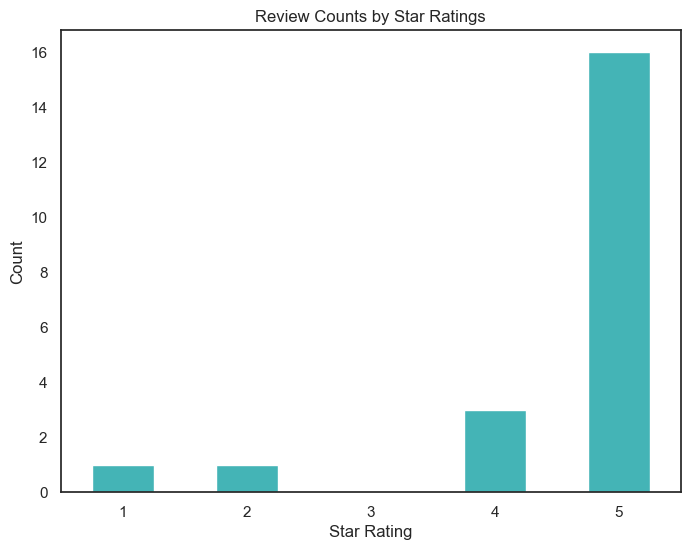

In [115]:
# Ensure all possible ratings are included in the dataframe
ratings_counts = class_reviews['Rating'].value_counts().reindex(range(1, 6), fill_value=0)

# Create a bar plot
sns.set_style('white')
plt.figure(figsize=(8, 6)) 
ratings_counts.plot(kind='bar', color='#44B4B6')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Review Counts by Star Ratings')
plt.xticks(rotation=0)  
plt.show()

Text(0.5, 1.0, 'Review: Sentiment sensitivity')

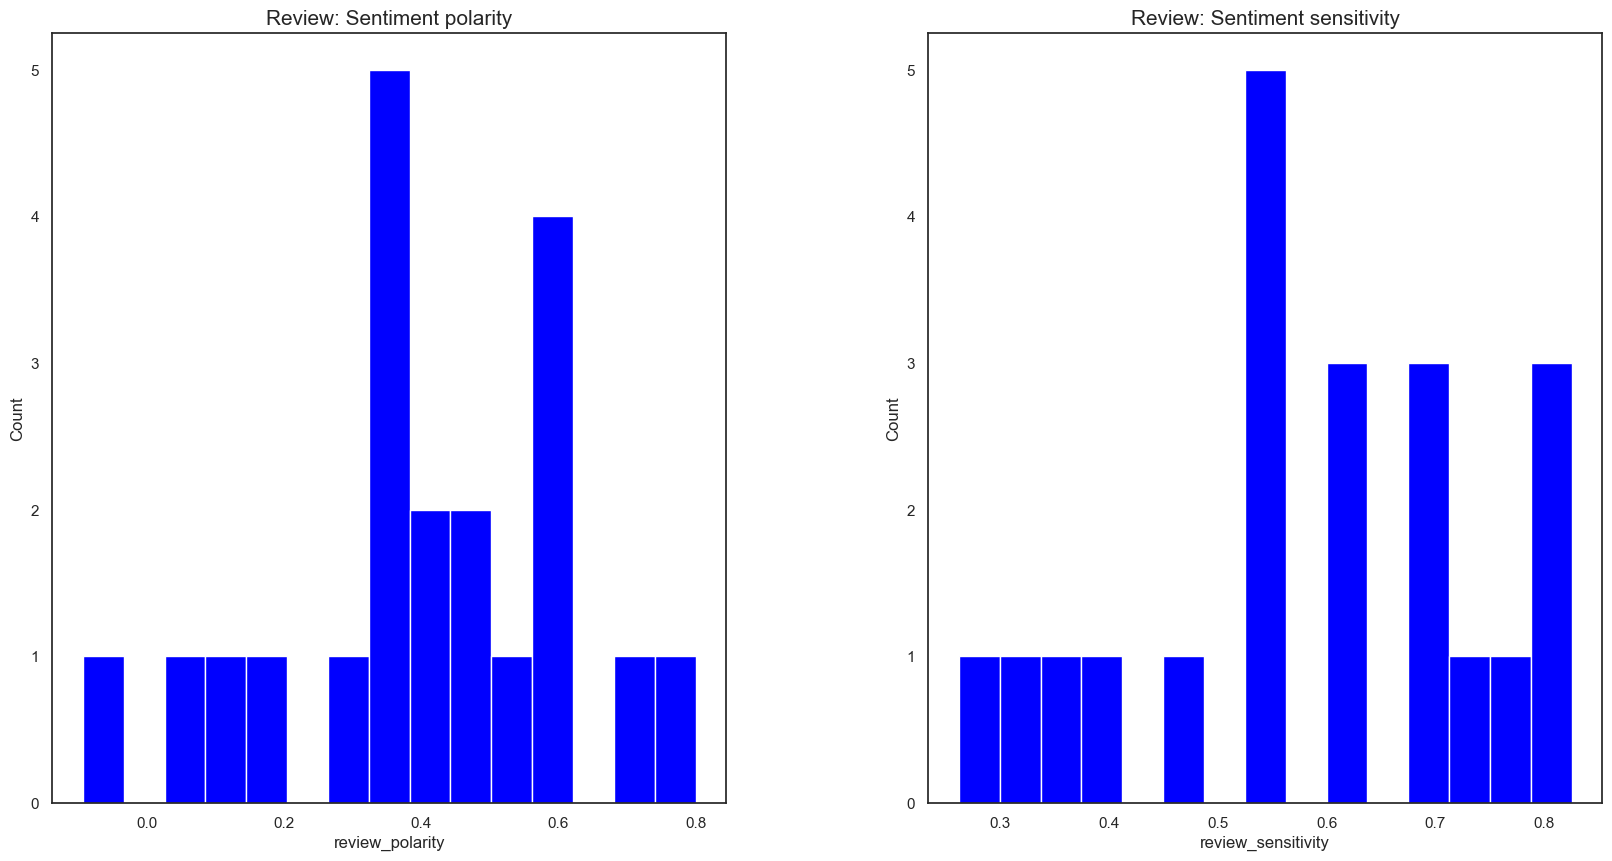

In [116]:
# Create an empty plot for the histograms.
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('whitegrid')

# Set the padding between the subplots in the figure.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

# Define the bars for each plot
sns.histplot(data=class_reviews, x='review_polarity', bins=15, facecolor='blue', ax=axs[0])\
.set_title('Review: Sentiment polarity', fontsize = 15)

sns.histplot(data=class_reviews, x='review_sensitivity', bins=15, facecolor='blue', ax=axs[1])\
.set_title('Review: Sentiment sensitivity', fontsize = 15)

In [117]:
# Create a new DataFrame. 
reviews_tokens = class_reviews.copy()

reviews_tokens.drop(columns=['Username','Total reviews','location','date','content','Rating'], inplace=True)

# Apply tokenisation to both columns.
reviews_tokens['content_sentiment'] = reviews_tokens['content_sentiment'].apply(word_tokenize)

reviews_tokens.head()

,content_sentiment,review_polarity,review_sensitivity
0,"[absolutely, excellent, member, pure, gym, finchley, six, kept, membership, even, lockdown, continued, harley, booths, youtube, classes, every, week, continuing, benefit, also, attend, person, sometimes, well, motivated, currently, often, attend, brian, koulens, class, sunday, really, april]",0.353571,0.525000
1,"[quick, easy, sign, upto, puregym, membership, onlinesigning, join, club, online, however, questions, prior, signing, telephone, number, speak, customer, service, instead, correspondence, done, via, email, good, app, details, local, gym, booking, classes, etc, date, april]",0.293333,0.386667
2,"[much, needed, gym, ruislipthe, gym, lovely, spacious, team, friendly, absolutely, love, motivating, already, learned, much, never, used, like, classes, allow, miss, experience, glad, gym, april]",0.379167,0.541667
3,"[yoga, classyoga, classi, yoga, classes, danielle, since, joined, branch, can, not, recommend, enough, hope, classes, added, two, classes, week, class, always, fully, booked, extensive, waiting, list, much, body, mindful, soothing, voice, meditation, end, session, positive, impact, overall, health, think, everyone, try, thank, danielle, april]",0.085455,0.315758
4,"[pure, gym, kettering, gym, kettering, fitness, spacious, caters, workout, friendly, staff, always, hand, offer, diverse, range, classes, ensures, something, whether, beginner, seasoned, pure, gym, kettering, provides, perfect, environment, achieve, fitness, brimming, positive, definitely, gym, april]",0.325835,0.542208


In [118]:
# Define an empty list of review tokens.
all_review_tokens = []

for i in range(reviews_tokens.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + reviews_tokens['content_sentiment'][i]
    
print(all_review_tokens[:50])

['absolutely', 'excellent', 'member', 'pure', 'gym', 'finchley', 'six', 'kept', 'membership', 'even', 'lockdown', 'continued', 'harley', 'booths', 'youtube', 'classes', 'every', 'week', 'continuing', 'benefit', 'also', 'attend', 'person', 'sometimes', 'well', 'motivated', 'currently', 'often', 'attend', 'brian', 'koulens', 'class', 'sunday', 'really', 'april', 'quick', 'easy', 'sign', 'upto', 'puregym', 'membership', 'onlinesigning', 'join', 'club', 'online', 'however', 'questions', 'prior', 'signing', 'telephone']


In [119]:
# Define an empty string variable for reviews.
reviews_string = ''

for value in all_review_tokens:
    # Add each filtered token word to the string.
    reviews_string = reviews_string + value + ' '
    
print(reviews_string[:100])

absolutely excellent member pure gym finchley six kept membership even lockdown continued harley boo


In [120]:
# Create a TextBlob object
blob = TextBlob(reviews_string)

# Perform sentiment analysis
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Print the results
print("Sentiment polarity:", polarity)
print("Sentiment subjectivity:", subjectivity)

Sentiment polarity: 0.43129277739804045
Sentiment subjectivity: 0.5883757120072911


In [121]:
# Create a DataFrame.
positive_class_reviews = class_reviews.nlargest(5, 'review_polarity')

# Set display options
pd.set_option('display.max_colwidth', None)  # Display full column width
pd.set_option('display.max_rows', None)  # Display all rows

positive_class_reviews.head()

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
19,customer from California,3 reviews,US,4 days agoVerified,"Great gym in a great locationGreat gym in a great location. Loved the Spin class. Gary(?) was awesome and tough, in a good way 👏 Date of experience: April 17, 2024",5,great gym great locationgreat gym great loved spin awesome good way date april,0.800000,0.775000
20,Mrs Brace,2 reviews,GB,3 days ago,"Great classes with amazing instructors .Date of experience: April 19, 2024",5,great classes amazing instructors april,0.700000,0.825000
5,Baaba,1 review,GB,3 days agoVerified,"Awesome Great! I'm enjoying every class I've signed up so far. My only advice is if new comers could be guided through to choose classes which are beginner friendly, it would be of great help. Overall, I love everything. The trainers i have experienced and the staff who met me on the first day all are excellent at their jobs and have great customer relationships. The app is also a great help. Thank you, Pure GymDate of experience: April 16, 2024",5,awesome enjoying every class signed advice new comers could guided choose classes beginner would great love trainers experienced staff met first day excellent jobs great customer app also great thank pure gymdate april,0.618241,0.694353
8,S Warford,1 review,GB,3 days ago,"Very friendly, excellent classes 👌 Very friendly, inclusive gym.Plenty of classes to chose fromHelpful staffGreat range of equipment No contract and very very reasonable monthly charge 👍 Date of experience: April 19, 2024",5,excellent classes inclusive classes chose fromhelpful staffgreat range equipment contract reasonable monthly charge date april,0.600000,0.800000
18,Surinder,1 review,GB,3 days agoVerified,"Friendly environmentFriendly environment, and great classes, and I can use it any time. Date of experience: April 14, 2024",5,friendly environmentfriendly great use date april,0.587500,0.625000


In [122]:
# Create a DataFrame.
negative__class_reviews = class_reviews.nsmallest(5, 'review_polarity')

negative__class_reviews

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity
10,customer,1 review,GB,5 days agoVerified,"A little smelly also no exercise mats…A little smelly also no exercise mats on second floor I went in the studio to pick one up I was told women class get out why not just put some outside the studio problem solved.Date of experience: April 13, 2024",2,little smelly also exercise little smelly also exercise mats second floor went studio pick one told women class get put outside studio problem april,-0.093750,0.262500
9,Kate Taylor,1 review,GB,4 days agoVerified,"Absolutely awfulAbsolutely awful. Took my money and sent receipt and feedback survey, but never sent a pin. Turned up to the gym as it was only a day pass and I'd waited an hour for this pin... and wanted to use the actual gym, and they wouldn't let me in as the manager was 'in a class'... now I have driven home I am looking at spending an hour trying to get the money back. NO human to speak to. No phone humber as it's an online gym. Just AWFULDate of experience: April 18, 2024",1,absolutely awfulabsolutely took money sent receipt feedback never sent turned gym day pass waited hour wanted use actual let manager driven home looking spending hour trying get money human speak phone humber online awfuldate april,0.066667,0.366667
3,Mariana Antonio,19 reviews,GB,5 days ago,"Yoga ClassYoga ClassI have been doing yoga classes with Danielle since she joined this branch and I cannot recommend her enough and I hope that more classes are added as two classes a week are not enough! The class is always fully booked with extensive waiting list because this is much more than just a class. It’s a body and a mindful experience. From the music, Danielle’s soothing voice tone, meditation at the end of the session and the positive impact it has on my overall health I think everyone should try it! Thank you Danielle ☺️Date of experience: April 17, 2024",5,yoga classyoga classi yoga classes danielle since joined branch cannot recommend enough hope classes added two classes week class always fully booked extensive waiting list much body mindful soothing voice meditation end session positive impact overall health think everyone try thank danielle april,0.085455,0.315758
11,Chloe harvey,1 review,GB,2 days agoVerified,"Recommend…Did the box class with Chris this morning, fab instructor inclusive class highly recommend Date of experience: April 17, 2024",4,box class chris fab instructor inclusive class highly recommend date april,0.160000,0.540000
1,F N,15K reviews,GB,A day agoVerified,"Quick And Easy To Sign Upto To PureGym Membership OnlineSigning up to join the club online was straightforward. However if you have any questions prior or after signing up there is no telephone number to speak to a Customer Service “Person” and instead any correspondence is done via email exchanges. Very good App for details of your local gym and booking classes etc Date of experience: April 17, 2024",4,quick easy sign upto puregym membership onlinesigning join club online however questions prior signing telephone number speak customer service instead correspondence done via email good app details local gym booking classes etc date april,0.293333,0.386667


### Observations

> Negative reviews mention poor customer service, temperature settings too cold, and noisy classes that interfere with people exercising in the public spaces.

In [123]:
filtered_reviews = review_data[review_data['Rating'] == 1]

filtered_reviews

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity


In [124]:
# Sentiment Analysis usng Python's NLTK Library
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure you have downloaded the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ayeshakhalil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [125]:
# Analysis of sentiment
positive_reviews = review_data[review_data['review_polarity'] > 0.05]
negative_reviews = review_data[review_data['review_polarity'] < -0.05]
neutral_reviews = review_data[(review_data['review_polarity'] >= -0.05) & (review_data['review_polarity'] <= 0.05)]

In [126]:
# Function to categorize polarity into sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [127]:
review_data['sentiment_category'] = review_data['review_polarity'].apply(categorize_sentiment)

review_data

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity,sentiment_category
0,Jane Teacher,28K reviews,GB,19 hours ago,"Absolutely excellent Been a member of pure gym Finchley for about six years. I have kept up the membership even during lockdown as have continued with Harley booths YouTube classes every week so continuing to benefit from Puregym. Now also attend in person sometimes as well as doing Harley’s exercises. Instructor’s excellent, motivated and motivational. Currently often attend Brian koulens class on a Sunday lunchtime. He is really good.Date of experience: April 21, 2024",5,absolutely excellent member pure gym finchley six kept membership even lockdown continued harley booths youtube classes every week continuing benefit also attend person sometimes well motivated currently often attend brian koulens class sunday really april,3.535714e-01,0.525000,Positive
1,F N,15K reviews,GB,A day agoVerified,"Quick And Easy To Sign Upto To PureGym Membership OnlineSigning up to join the club online was straightforward. However if you have any questions prior or after signing up there is no telephone number to speak to a Customer Service “Person” and instead any correspondence is done via email exchanges. Very good App for details of your local gym and booking classes etc Date of experience: April 17, 2024",4,quick easy sign upto puregym membership onlinesigning join club online however questions prior signing telephone number speak customer service instead correspondence done via email good app details local gym booking classes etc date april,2.933333e-01,0.386667,Positive
2,Claire Peck,690 reviews,GB,A day agoVerified,"Nice largeNice large, spacious gym. Everyone was friendly and willing to help ( as it was my first time) it’s very clean and has more than enough equipment. Everyone just concentrating on their own thing rather than everybody else. Date of experience: April 17, 2024",5,nice largenice spacious everyone friendly willing help first clean enough everyone concentrating thing rather everybody date april,3.069444e-01,0.630556,Positive
3,Beracahmusic International Min,6 reviews,GB,15 hours ago,"The customer service is next to noneThe customer service is next to none. I was not sure about communicating via their online portal and not by telephone. However, as promised, I received a response to my email query within the 24 - 48 hours period. Date of experience: April 20, 2024",5,customer service next nonethe customer service next sure communicating via online portal received response email query within hours date april,1.666667e-01,0.296296,Positive
4,David,1 review,GB,3 days agoVerified,"Happy gymI love PureGym I just recently joined and has anything a gym should have . Good range of weights , machines , cables. Their app is also very useful for tracking workouts, progress as well as giving useful tips. Also nice reductions for members on MyProtein. 6 squat / power racks is also a nice additionDate of experience: April 11, 2024",5,happy gymi love puregym recently joined anything gym good range weights machines app also useful tracking progress well giving useful also nice reductions members squat power racks also nice additiondate april,4.750000e-01,0.556250,Positive
5,Ms Toyne,18 reviews,GB,4 days ago,"Best PureGym I've been toI use PureGyms in various locations when I'm travelling and this is one of the best. Deceptively large, given the small frontage, across three floors, every machine you can think of catering for all from the serious athlete to the wannabe a bit fitter like me. I especially like the range of cardio vascular equipment, plenty of stair climbers, cross trainers, power mills, treadmills, rowers, crossbike, etc. The ground floor has weight lifting equipment, the mezzanine has weight training machines. There's plenty of lose weights and a generous stretching area with foam rollers.In my home town of Bristol I pay twice as much for David Lloyd and the r

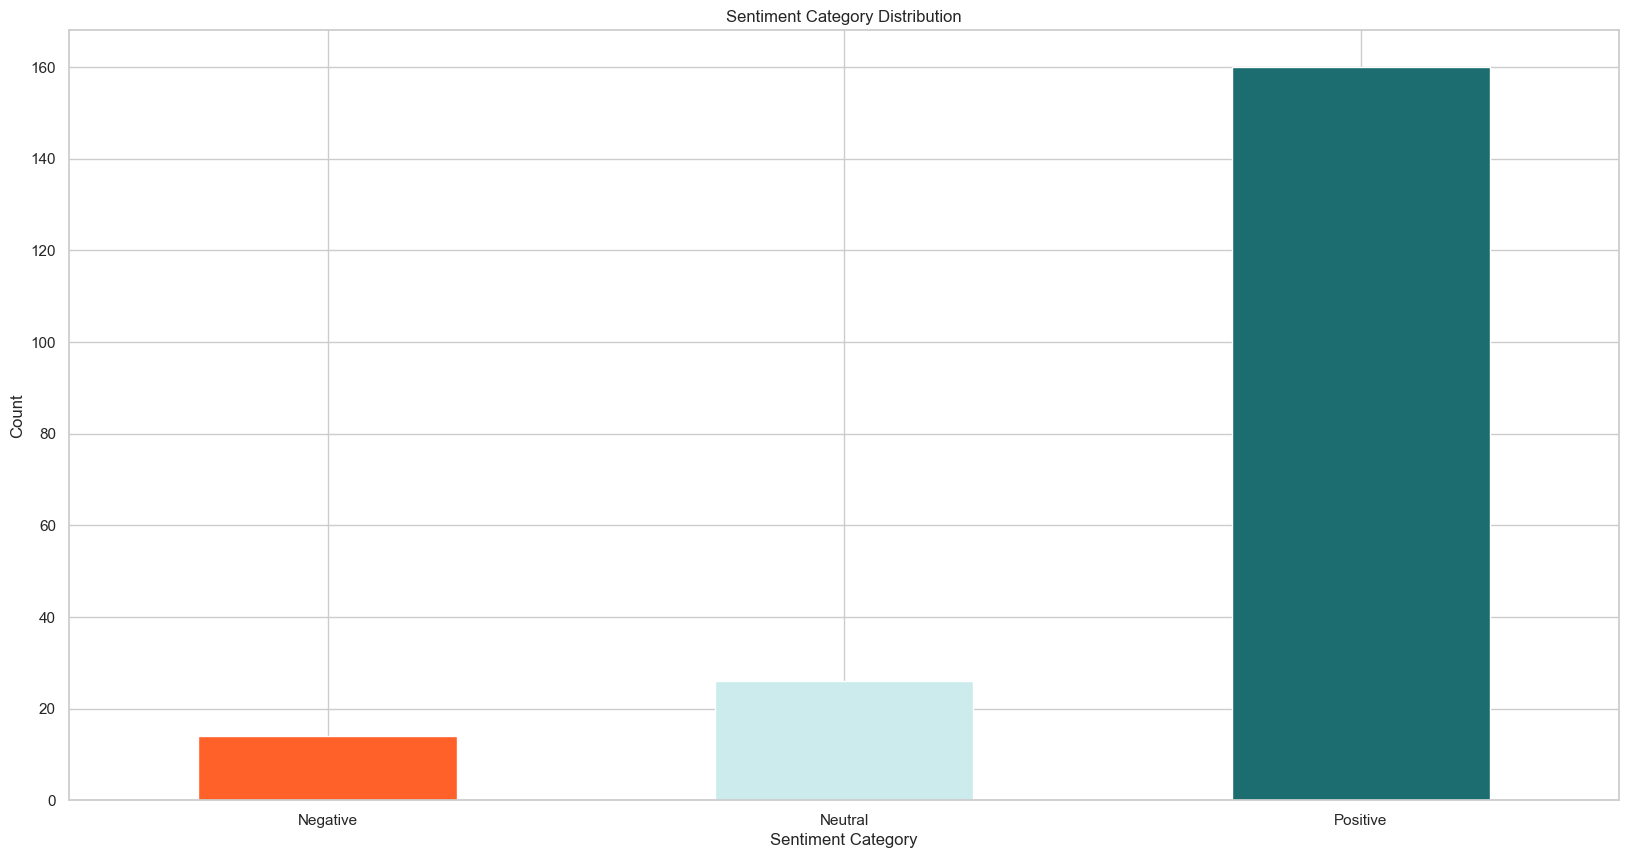

In [128]:
# Count the occurrences of each sentiment category
sentiment_counts = review_data['sentiment_category'].value_counts()

# Define the order of sentiment categories
order = ['Negative', 'Neutral', 'Positive']

# Reorder the index of sentiment_counts
sentiment_counts = sentiment_counts.reindex(order)

# Plot the bar graph
sentiment_counts.plot(kind='bar', color=['#FF6129', '#CCEBEC', '#1B6D6F'], rot=0)

# Add title and labels
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [129]:
class_reviews['sentiment_category'] = class_reviews['review_polarity'].apply(categorize_sentiment)

class_reviews 

,Username,Total reviews,location,date,content,Rating,content_sentiment,review_polarity,review_sensitivity,sentiment_category
0,Jane Teacher,28K reviews,GB,19 hours ago,"Absolutely excellent Been a member of pure gym Finchley for about six years. I have kept up the membership even during lockdown as have continued with Harley booths YouTube classes every week so continuing to benefit from Puregym. Now also attend in person sometimes as well as doing Harley’s exercises. Instructor’s excellent, motivated and motivational. Currently often attend Brian koulens class on a Sunday lunchtime. He is really good.Date of experience: April 21, 2024",5,absolutely excellent member pure gym finchley six kept membership even lockdown continued harley booths youtube classes every week continuing benefit also attend person sometimes well motivated currently often attend brian koulens class sunday really april,0.353571,0.525000,Positive
1,F N,15K reviews,GB,A day agoVerified,"Quick And Easy To Sign Upto To PureGym Membership OnlineSigning up to join the club online was straightforward. However if you have any questions prior or after signing up there is no telephone number to speak to a Customer Service “Person” and instead any correspondence is done via email exchanges. Very good App for details of your local gym and booking classes etc Date of experience: April 17, 2024",4,quick easy sign upto puregym membership onlinesigning join club online however questions prior signing telephone number speak customer service instead correspondence done via email good app details local gym booking classes etc date april,0.293333,0.386667,Positive
2,Dani P,1 review,GB,12 hours ago,"Much needed gym in RuislipThe gym is lovely and spacious and the team are very friendly and helpful. I absolutely love Vivien’s classes. She is so motivating and I already learned so much from her. I never used to like classes but now I can’t allow myself to miss any. It’s a 10/10 experience for me and I’m so glad this gym is in the area.Date of experience: April 19, 2024",5,much needed gym ruislipthe gym lovely spacious team friendly absolutely love motivating already learned much never used like classes allow miss experience glad gym april,0.379167,0.541667,Positive
3,Mariana Antonio,19 reviews,GB,5 days ago,"Yoga ClassYoga ClassI have been doing yoga classes with Danielle since she joined this branch and I cannot recommend her enough and I hope that more classes are added as two classes a week are not enough! The class is always fully booked with extensive waiting list because this is much more than just a class. It’s a body and a mindful experience. From the music, Danielle’s soothing voice tone, meditation at the end of the session and the positive impact it has on my overall health I think everyone should try it! Thank you Danielle ☺️Date of experience: April 17, 2024",5,yoga classyoga classi yoga classes danielle since joined branch cannot recommend enough hope classes added two classes week class always fully booked extensive waiting list much body mindful soothing voice meditation end session positive impact overall health think everyone try thank danielle april,0.085455,0.315758,Positive
4,customer,1 review,GB,3 days agoVerified,"Pure Gym Kettering is a haven for…Pure Gym Kettering is a haven for fitness enthusiasts! With its state-of-the-art equipment, spacious layout, and 24/7 accessibility, it caters to everyone's workout needs. The friendly staff are always on hand to offer guidance, and the diverse range of classes ensures there's something for everyone. Whether you're a beginner or a seasoned gym-goer, Pure Gym Kettering provides the perfect environment to achieve your fitness goals. Clean, well-maintained, and brimming with positive energy, it's definitely my go-to gym in town!Date of experience: April 16, 2024",5,pure gym kettering gym kettering fitness spacious caters workout friendly staff always hand offer diverse range classes ensures something whether beginn

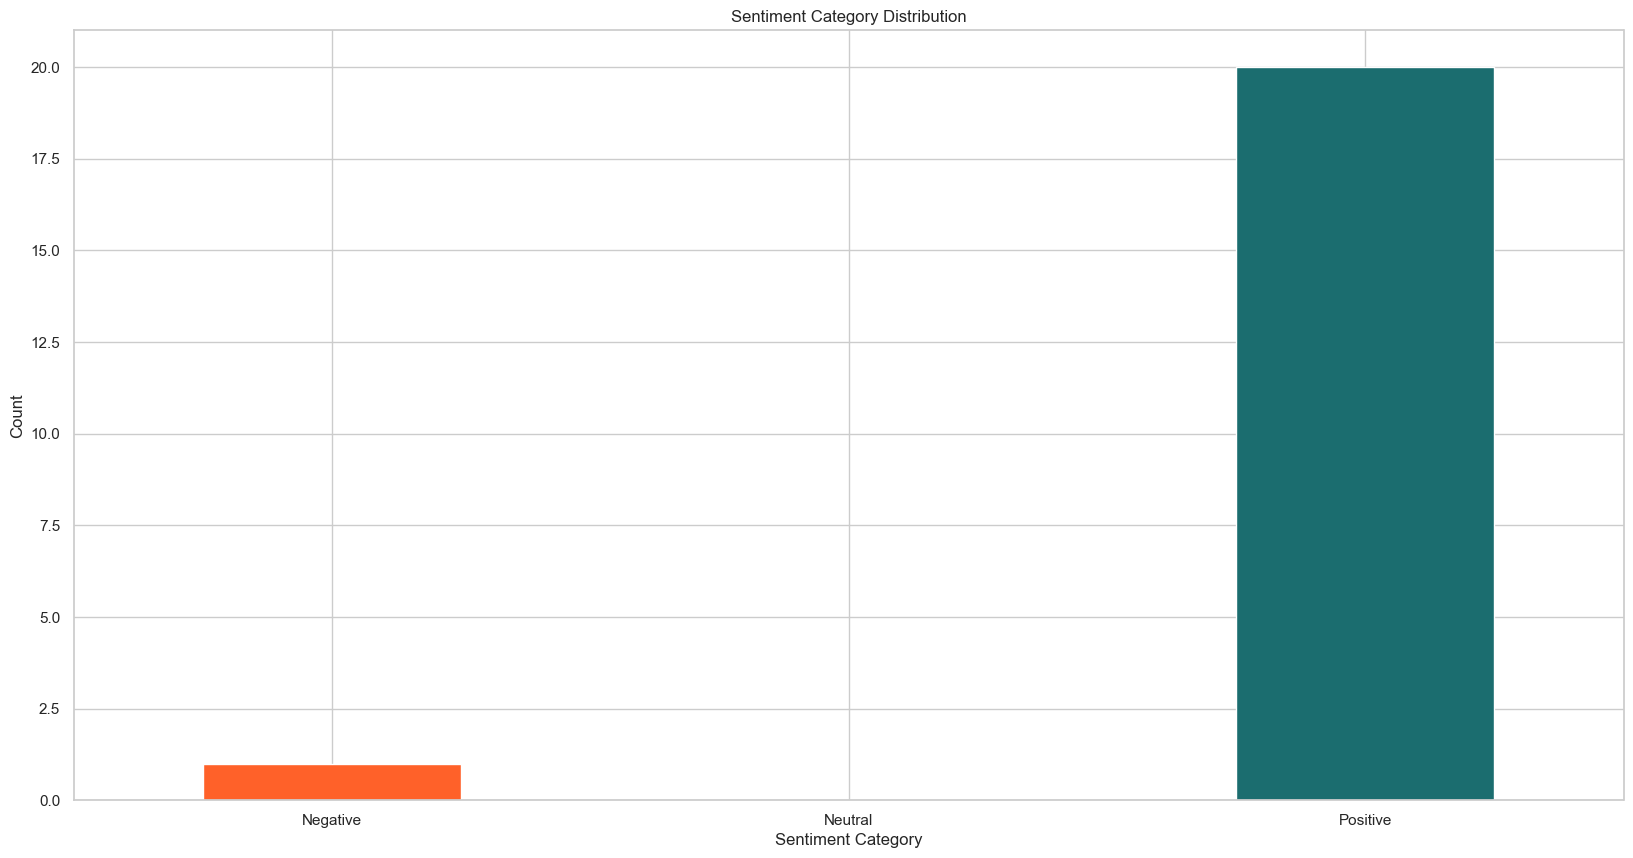

In [130]:
# Count the occurrences of each sentiment category
sentiment_counts = class_reviews['sentiment_category'].value_counts()

# Define the order of sentiment categories
order = ['Negative', 'Neutral', 'Positive']

# Reorder the index of sentiment_counts
sentiment_counts = sentiment_counts.reindex(order)

# Plot the bar graph
sentiment_counts.plot(kind='bar', color=['#FF6129', '#CCEBEC', '#1B6D6F'], rot=0)

# Add title and labels
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Show the plot
plt.show()

## Section 4: Conclusion and Recommendations

The overall observations and strategies have been summarised in this section. 

### Key Observations and Findings:
- **Member Segmentation** has successfully identified three distinct clusters of gym members, each requiring different engagement strategies:
  - **Casual Users**: Predominantly female, infrequent visits, benefit from flexible membership options.
  - **Emerging Enthusiasts**: A balanced gender mix, integrating fitness into their lifestyle, responsive to community-building initiatives.
  - **Dedicated Regulars**: Predominantly younger males, high frequency of visits, interested in advanced fitness programs and loyalty rewards.

- **Group Exercise Provision** analysis revealed a disparity in class attendance by gender, with a significant preference for cycle classes. Furthermore, the utilization and popularity data led to recommendations for timetable adjustments to better align with member attendance patterns.

- **Member Experience**: Sentiment analysis of online reviews highlighted overall positive feedback but pointed out specific areas needing improvement such as class capacity and waiting times.

- **Business Performance**: The analysis of no-show data indicated an opportunity to enhance class capacity utilization. A significant no-show rate persists despite existing penalties, suggesting a need for new strategies.

### Recommendations:
1. **Revise Group Exercise Timetable**:
   - Replace low-attendance classes with those demonstrating higher demand to optimize space and resource usage.
   - Conduct further analysis to understand low male attendance and develop targeted promotions or class offerings.

2. **Enhance Member Onboarding and Engagement**:
   - Implement personalized fitness plans and introductory programs for new members, particularly targeting casual users to convert them into regular visitors.
   - Strengthen the community aspect of the gym experience through social events and group challenges, appealing especially to Emerging Enthusiasts.

3. **Improve Class Management**:
   - Increase class capacities where possible and utilize dynamic scheduling to reduce wait times.
   - Introduce more rigorous strategies for managing no-shows, such as reminder systems and incentive-based attendance rewards.

4. **Pilot Test New No-Show Mitigation Strategies**:
   - Test the impact of no-show fees and check-in reminders on class attendance rates in selected locations before wider implementation.
   - Evaluate the effectiveness of incentives for consistent attendance, balancing potential costs against increased member participation.

### Forward Strategy:
By adopting these recommendations, PureGym can not only improve operational efficiency but also enhance member satisfaction. It's crucial to monitor the impact of implemented strategies through continuous data analysis and member feedback, allowing for timely adjustments. Strategic focus should remain on aligning gym offerings with member preferences to foster a motivated and loyal community.

<font color='blue'> Additional Analysis such as Correlation analysis and Predictive modelling of Gym Visits are available in the Additional Analysis Notebook attached with this analytics package.</font>
